# Loading all the libraries

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from plotnine import *
import scipy.stats as st
from scipy.interpolate import interp1d

sn.set(font_scale=1.4)#for label size

from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [14]:
fileprefix = "../CardStockXam/bin/Release3/games/"
count = {"AllAI":100, 
         "AllRnd":100, 
         "RndandAI":100}
typename = {"AllAI":"All AI Players", 
            "AllRnd":"Random Players", 
            "RndandAI":"One AI, Rest Random Players"}
convergence = {}
heuristics = {}

tricktaking = True
cbbPalette = ["#D55E00", "#009E73", "#0072B2", "#000000", "#CC79A7" ]


# Game Information

In [20]:
games = [
    {"file":"Hearts","name":"Hearts", "player": 4},
    {"file":"HeartsNoMoon","name":"Broken Hearts", "player": 4},
    {"file":"BlackLady","name":"Black Lady", "player": 4},
    {"file":"PureHearts","name":"Pure Hearts", "player": 4},
    {"file":"BlackMaria","name":"BlackMaria", "player": 4},
    {"file":"HeartsOmnibus","name":"Omnibus Hearts", "player": 4},
    {"file":"Hearts7Q","name":"Grey Lady", "player": 4},
    {"file":"WidowHearts","name":"Widow Hearts", "player": 4},
    {"file":"SpotHearts","name":"Spot Hearts", "player": 4},
    {"file":"Polignac","name":"Polignac", "player": 4},
    {"file":"SlobberHannes","name":"SlobberHannes", "player": 4},
    {"file":"CheeseheadsPicker","name":"Cheeseheads Picker", "player": 5},
    {"file":"CheeseheadsLeaster","name":"Cheeseheads Leaster", "player": 5},
    {"file":"SheepsheadPicker","name":"Sheepshead Picker", "player": 5},
    {"file":"CheeseheadPickerBury","name":"Cheeseheads Picker Bury", "player": 5},
    {"file":"Enchere","name":"Enchère", "player":3},
    {"file":"Agram","name":"Agram", "player":4},
#    {"file":"Agram","name":"Agram", "player":2},
#    {"file":"Agram","name":"Agram", "player":3},
]

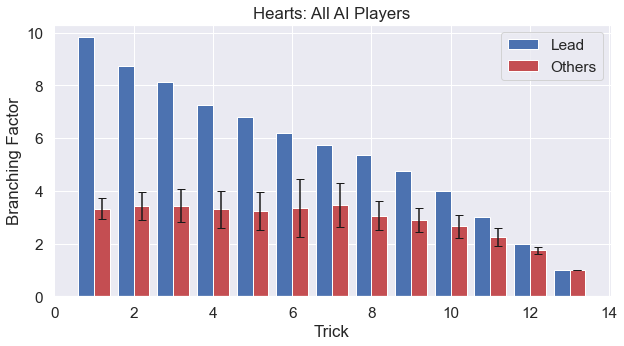

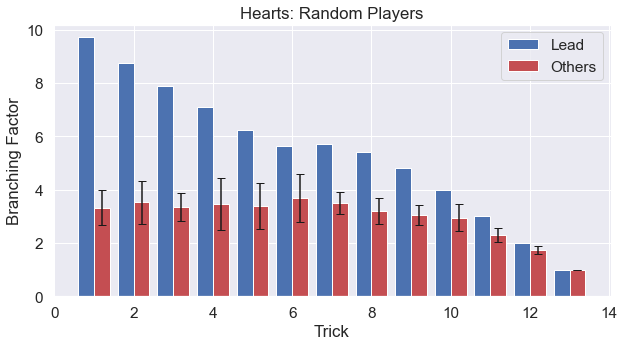

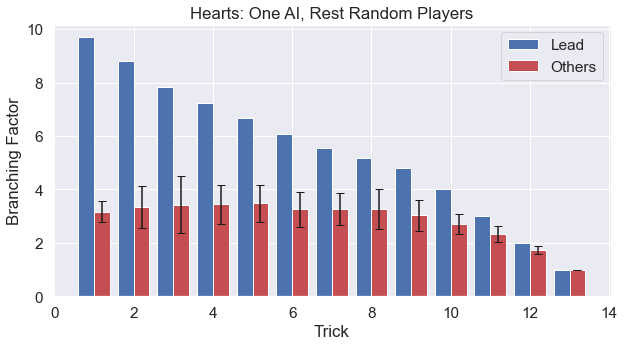

In [ ]:
w = 0.4
tricks = 13
epoch = 10
for type in count.keys():
    if tricktaking:
        fopen = open(prefix + game + str(4) + ".gdl" + type + "-choicestats.txt")
        data = fopen.readlines()
        fopen.close()
        nump = 4
        lead = np.zeros(tricks)
        follow = np.zeros(tricks)
        followerr = np.zeros(tricks)
        followall = []
        for i in range(tricks):
            followall.append([])
        for i in range(2, len(data[1:302]), 3):
            choices = [int(x) for x in data[i][:-2].strip().split(",")]
            for j in range(len(choices)):
                if (j % nump == 0):
                    lead[j // nump] += choices[j] / count[type]
                else:
                    follow[j // nump] += choices[j] / ((nump - 1) * count[type])
                    followall[j // nump].append(choices[j])
        for i in range(tricks):
            vals = []
            for j in range(epoch):
                x = sum(followall[i][epoch*j:epoch*(j+1)]) / (count[type]/epoch)
                vals.append(x)
            followerr[i] = np.std(vals)
        ax = plt.figure(figsize=(10,5)).gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.bar([x - w/2 for x in range(1, len(lead)+1)], lead, width=w)
        plt.bar([x + w/2 for x in range(1, len(follow) + 1)], follow, width=w, color="r")
        plt.errorbar([x + w/2 for x in range(1, len(follow) + 1)], follow, yerr=followerr, fmt='none', capsize=4, color="k")
        plt.xlabel("Trick")
        plt.ylabel("Branching Factor")
        plt.legend(["Lead", "Others"])
        plt.title(game + ": " + typename[type])
    #plt.ylim([0, 11])
    #plt.plot([0.8, 12.8], [13, 1], c="k")
    #plt.plot([0.8, 12.8], [9.5, -3.5], c="g")

# Branching Factor

This will draw graphs to show how the branching factor of the game changes over time

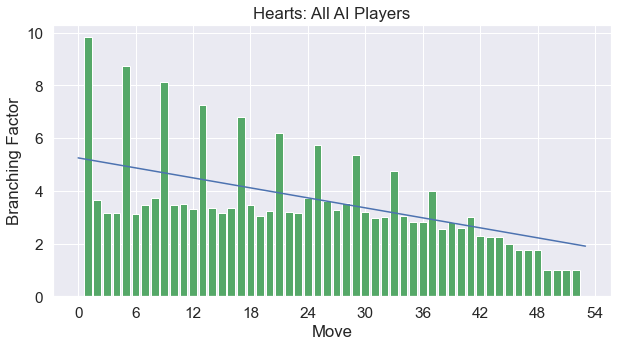

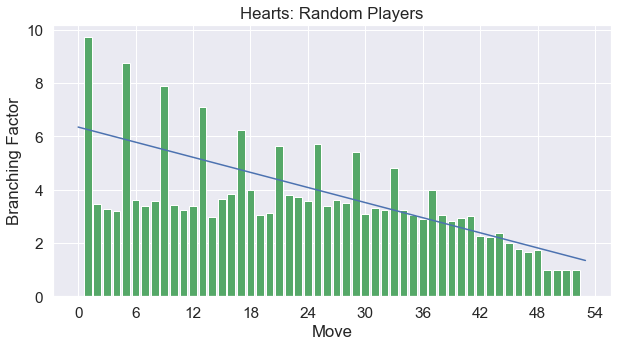

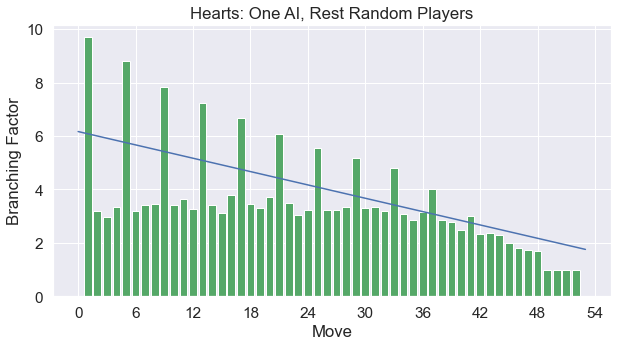

In [ ]:
for type in count:
    fopen = open(prefix + game + str(4) + ".gdl" + type + "-choicestats.txt")
    data = fopen.readlines()
    fopen.close()
    nump = 4
    everychoice = np.zeros(tricks * nump)
    for i in range(2, len(data[1:302]), 3):
        choices = [int(x) for x in data[i][:-2].strip().split(",")]
        slope, intercept, r_value, p_value, std_error = st.linregress(range(1, len(choices) + 1), choices)
        for j in range(len(choices)):
            everychoice[j] += choices[j] / count[type]

    ax = plt.figure(figsize=(10,5)).gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.bar(range(1, len(everychoice) + 1), everychoice, width=w*2, color="g")
    interps = np.linspace(0, len(everychoice) + 1, 200)
    plt.plot(interps, intercept + slope * interps)
    plt.xlabel("Move")
    plt.ylabel("Branching Factor")
    plt.title(game + ": " + typename[type])

RndandAI {}


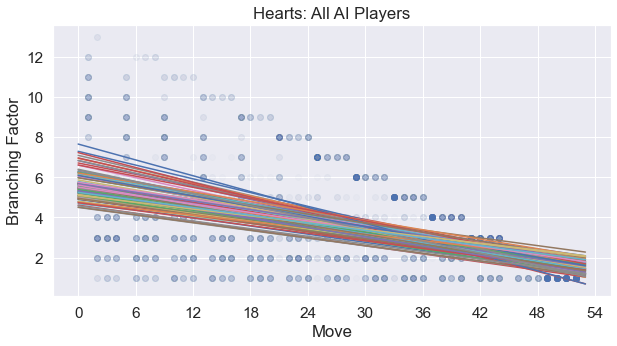

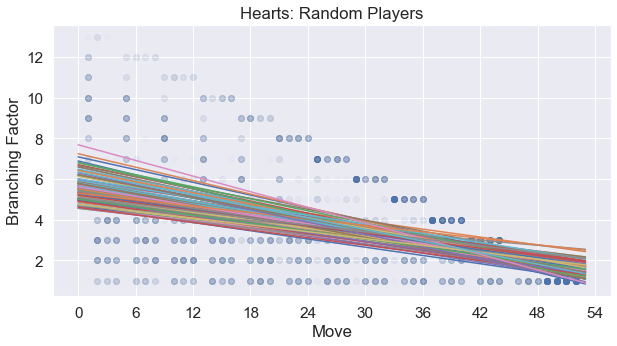

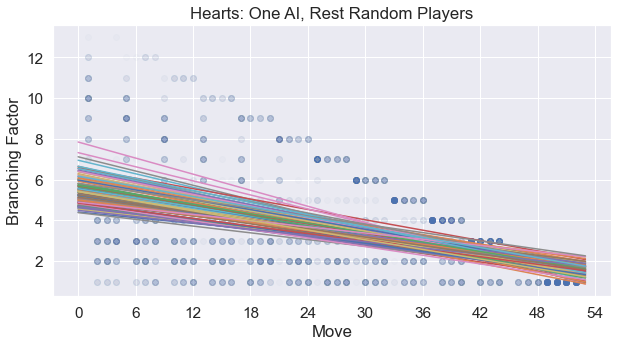

In [ ]:
choiceframe = []
for record in games:
    game = record["file"]
    nump = record["player"]

    for type in count:
        fopen = open(prefix + record["file"] + str(nump) + ".gdl" + type + "-choicestats.txt")
        data = fopen.readlines()
        fopen.close()
        heuristics["Convergence"] = 0
        
        for i in range(2, len(data[1:302]), 3):
            iteration = int(data[i-1][4:])
            choices = [int(x) for x in data[i][:-2].strip().split(",")]
            for j in range(len(choices)):
                choiceframe.append((j, choices[j], record["name"], type, , nump))
            slope, intercept, r_value, p_value, std_error = st.linregress(range(1, len(choices) + 1), choices)
            heuristics["Convergence"] += (1 - (slope / 2 + 0.5)) / count[type]

print(type, convergence)
choiceframe = pd.DataFrame(choiceframe, columns=["move", "choices", "game", "type", "iteration", "numPlayers"])


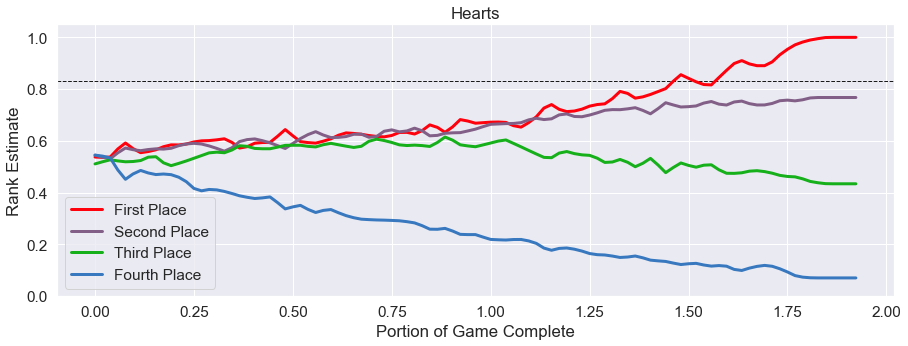

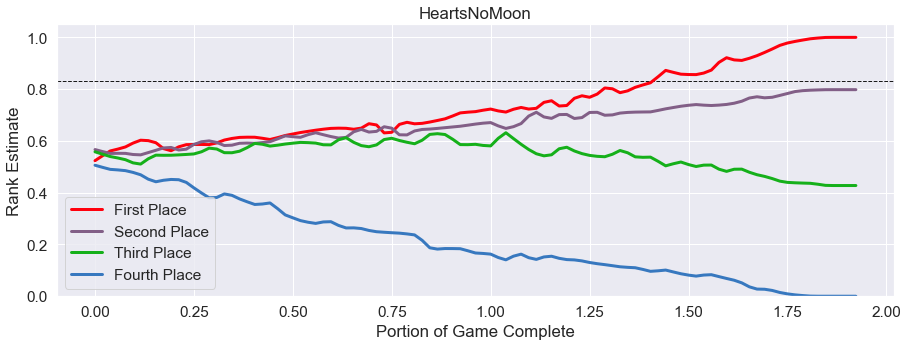

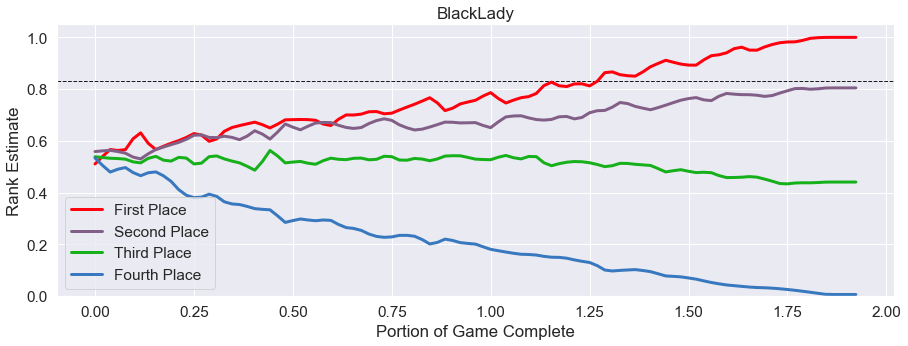

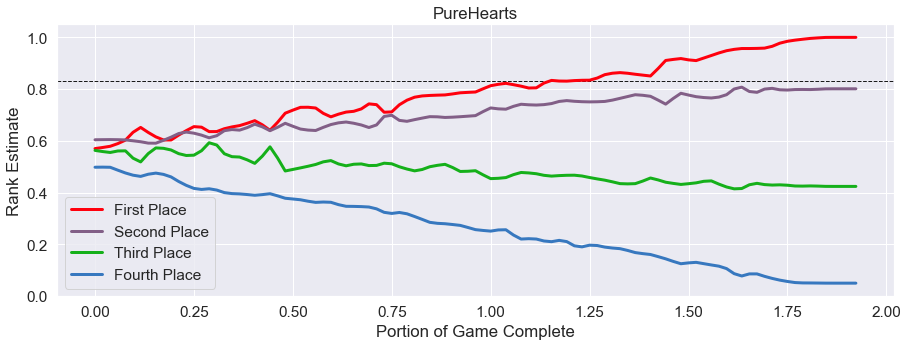

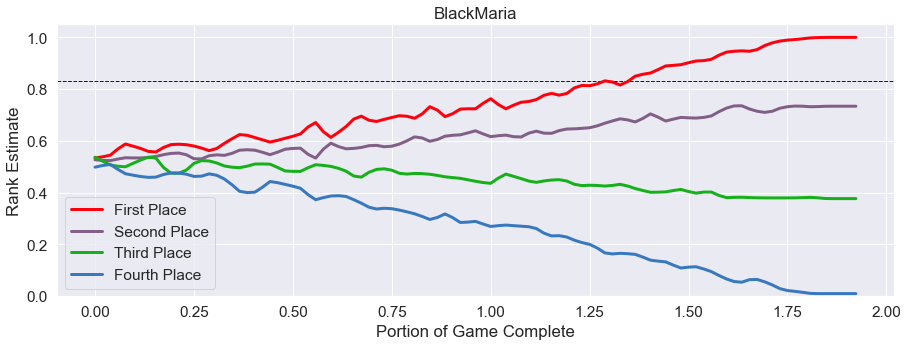

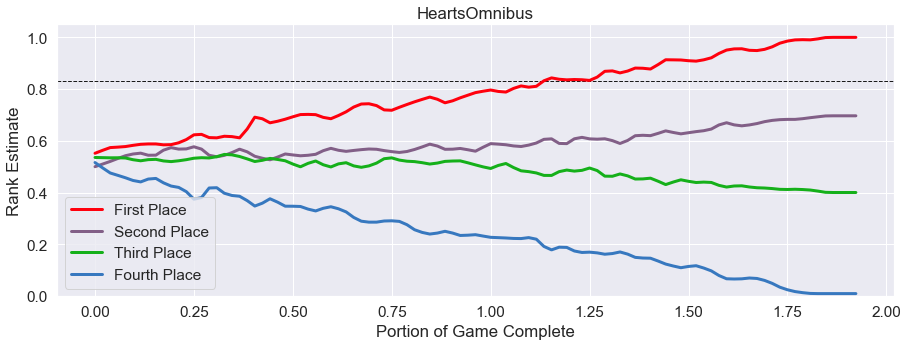

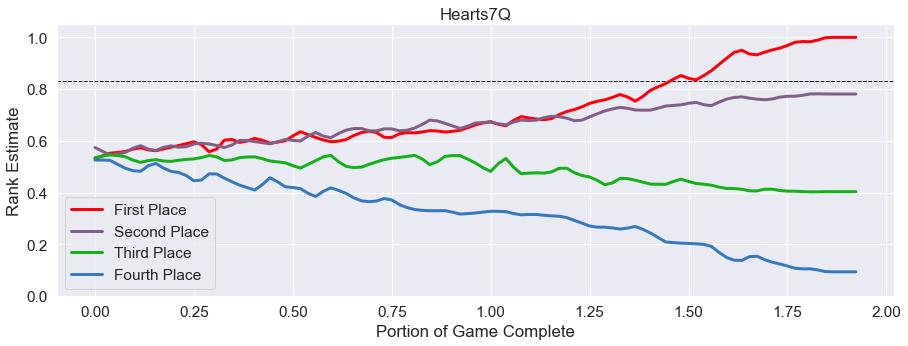

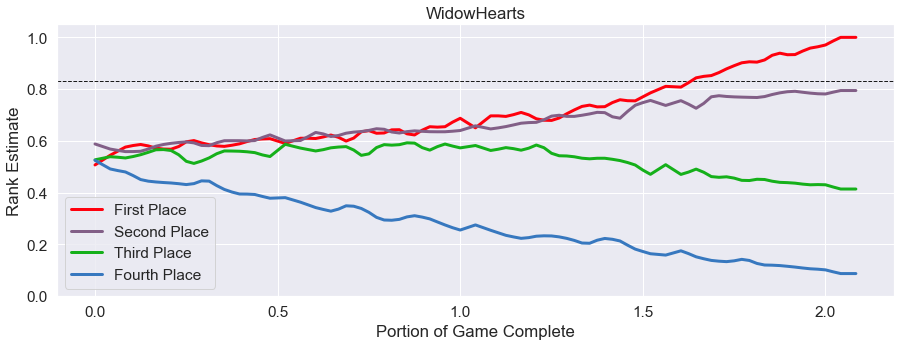

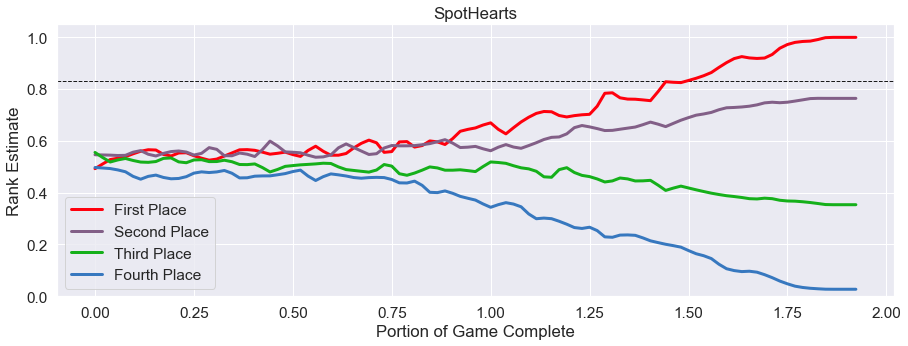

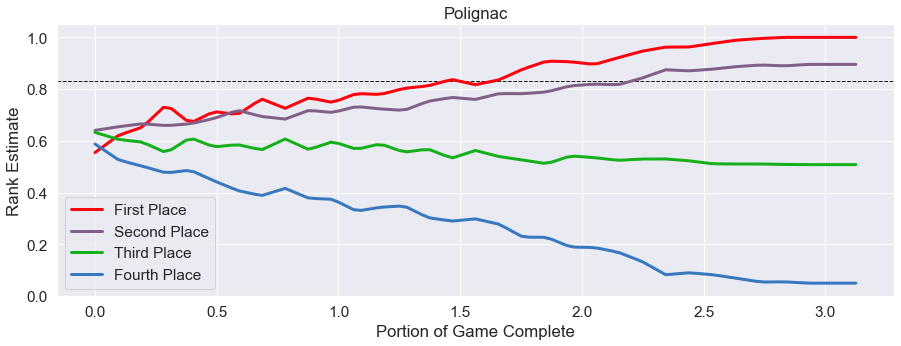

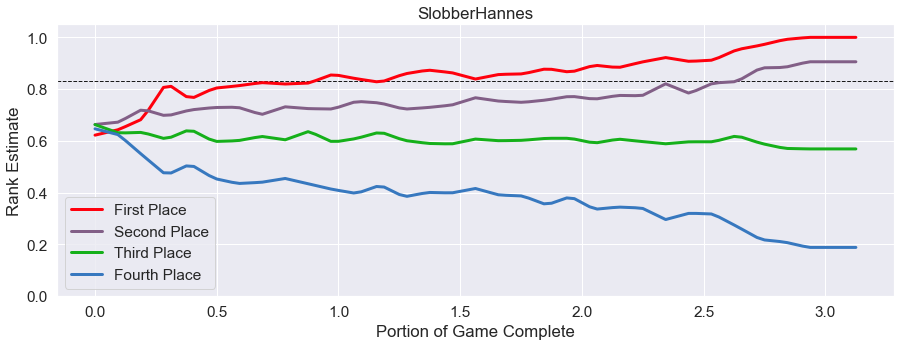

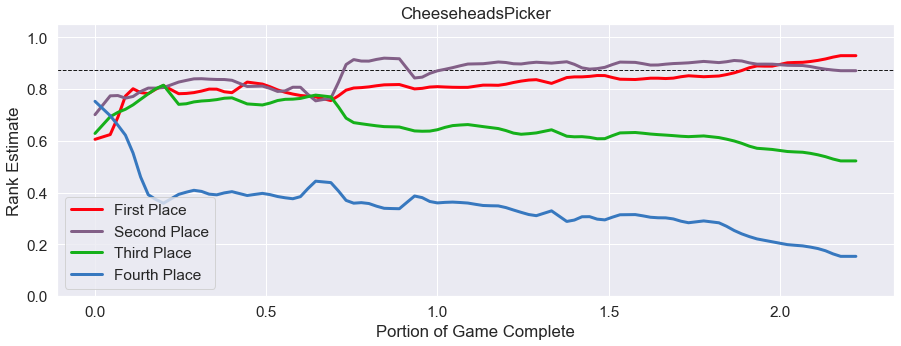

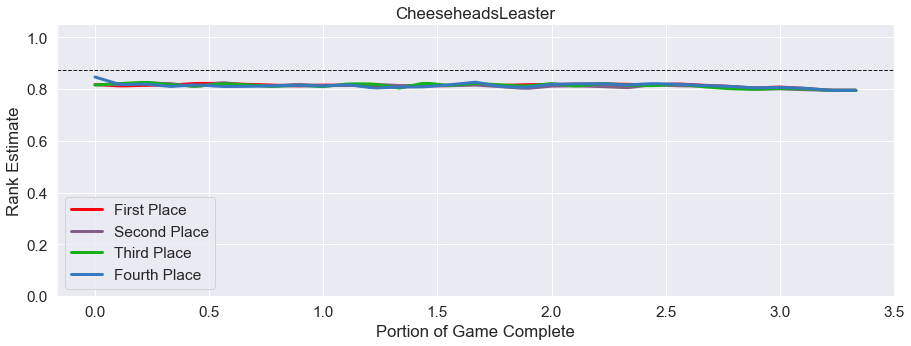

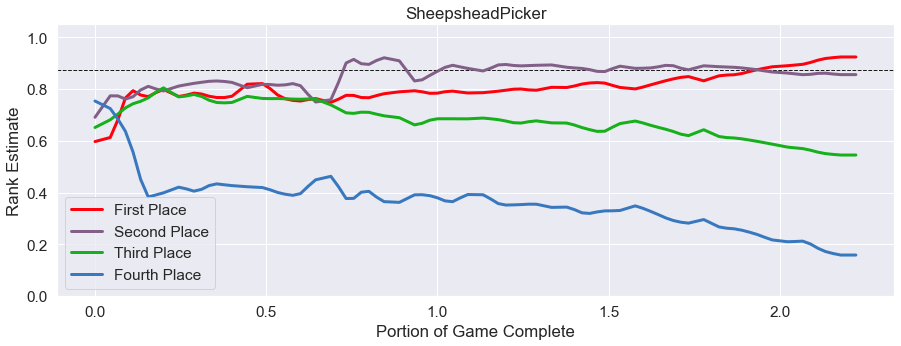

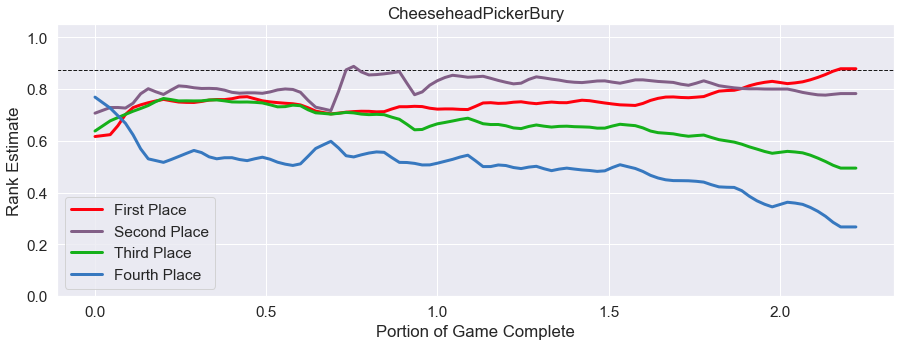

In [ ]:
def getKey(item):
    return item[0]

suffix = {1:"st", 
       2:"nd",
       3:"rd"}

dfave = []
vnames = ["Hearts", "Broken Hearts", "Black Lady", "Pure Hearts", "Black Maria", "Omnibus Hearts", "Grey Lady", "Widow Hearts", "Spot Hearts", "Polignac", "SlobberHannes", "CheeseheadsPicker", "CheeseheadsLeaster", "SheepsheadPicker", "CheeseheadPickerBury"]

a = 0
for game in ["Hearts", "HeartsNoMoon", "BlackLady", "PureHearts", "BlackMaria", "HeartsOmnibus", "Hearts7Q", "WidowHearts", "SpotHearts", "Polignac", "SlobberHannes", "CheeseheadsPicker", "CheeseheadsLeaster", "SheepsheadPicker", "CheeseheadPickerBury"]:
#for game in ["Knaves", "BlackMaria"]:
    nump = 4
    if game[2:4] == "ee":
        nump = 5
    dthresh = (1 + (nump - 2) / (nump - 1)) / 2

    heuristics["Drama"] = 0
    heuristics["Security"] = 0
    for type in ["AllAI"]:
        fopen = open("../CardStockXam/bin/Release3/games/" + game + str(nump) + ".gdl" + type + "-leadstats.txt")
        data = fopen.readlines()
        fopen.close()
        preds = [[] for i in range(nump)]
        averages = [np.zeros(101) for i in range(nump)]
       
        count2 = 0
        for d in data[2:]:
            if not d[0].isdigit():

                maxlen = 0
                for p in preds:
                    if len(p) > maxlen:
                        maxlen = len(p)


                ranks = [(preds[i][-1], i) for i in range(len(preds))]
                ranks.sort(key=getKey)
                winner = ranks[0][1]

                px = [x / maxlen for x in range(len(preds[0]) + 1)]

                for i in range(len(preds)):
                    f = interp1d(px, preds[ranks[i][1]] + [ranks[i][0]])
                    xnew = np.linspace(0, 1, num=101)
                    ynew = f(xnew)
                    averages[i] += ynew
                    for j in range(len(ynew)):
                        dfave.append([j/100, ynew[j], str(nump - i) + suffix.get(nump - i,"th"), str(ranks[i][1]+1) + suffix.get(ranks[i][1]+1, "th"), vnames[a], count2])
                    
                dcount = 0
                drama = 0
                for s in preds[winner]:
                    if s < dthresh:
                        dcount += 1
                        drama += (dthresh - s) ** 0.5
                if dcount > 0:
                    drama /= dcount
                heuristics["Drama"] += drama / count[type]
                heuristics["Security"] += (1 - dcount /  len(preds[winner])) / count[type]

                preds = [[] for i in range(nump)]
                count2 += 1
            else:
                leads = [float(x) for x in d[:-2].strip().split(",")]
                for p in range(nump):
                    preds[p].append(leads[p + 1])
    a += 1
dfave = pd.DataFrame(dfave, columns=["portion", "estimate", "rank", "position", "game", "iteration"])
    


# Lead History Dataframe Creation

In [25]:
def getKey(item):
    return item[0]

suffix = {1:"st", 
       2:"nd",
       3:"rd"}

dfave = []

for record in games:
    game = record["file"]
    nump = record["player"]

    for type in ["AllAI"]:
        fopen = open("../CardStockXam/bin/Release3/games/" + game + str(nump) + ".gdl" + type + "-leadstats.txt")
        data = fopen.readlines()
        fopen.close()
        preds = [[] for i in range(nump)]
        averages = [np.zeros(101) for i in range(nump)]
       
        count2 = 0
        if (len(data) > 0):
            iteration = int(data[1][4:])
        for d in data[2:]:
            if not d[0].isdigit():

                maxlen = 0
                for p in preds:
                    if len(p) > maxlen:
                        maxlen = len(p)


                ranks = [(preds[i][-1], i) for i in range(len(preds))]
                ranks.sort(key=getKey)
                winner = ranks[0][1]

                px = [x / maxlen for x in range(len(preds[0]) + 1)]

                for i in range(len(preds)):
                    f = interp1d(px, preds[ranks[i][1]] + [ranks[i][0]])
                    xnew = np.linspace(0, 1, num=101)
                    ynew = f(xnew)
                    averages[i] += ynew
                    for j in range(len(ynew)):
                        dfave.append([j/100, ynew[j], str(nump - i) + suffix.get(nump - i,"th"), str(ranks[i][1]+1) + suffix.get(ranks[i][1]+1, "th"), record["name"], iteration, nump])
                    

                preds = [[] for i in range(nump)]
                count2 += 1
                iteration = int(d[4:])

            else:
                leads = [float(x) for x in d[:-2].strip().split(",")]
                for p in range(nump):
                    preds[p].append(leads[p + 1])
dfave = pd.DataFrame(dfave, columns=["portion", "estimate", "rank", "position", "game", "iteration", "numPlayers"])
    


In [26]:
dfave

portion  estimate rank position    game  iteration  numPlayers
0          0.00  0.333333  4th      2nd  Hearts          0           4
1          0.01  0.385333  4th      2nd  Hearts          0           4
2          0.02  0.436000  4th      2nd  Hearts          0           4
3          0.03  0.470667  4th      2nd  Hearts          0           4
4          0.04  0.524000  4th      2nd  Hearts          0           4
...         ...       ...  ...      ...     ...        ...         ...
709924     0.96  1.000000  1st      4th   Agram         89           4
709925     0.97  1.000000  1st      4th   Agram         89           4
709926     0.98  1.000000  1st      4th   Agram         89           4
709927     0.99  1.000000  1st      4th   Agram         89           4
709928     1.00  1.000000  1st      4th   Agram         89           4

[709929 rows x 7 columns]

# Turn Order
## facet by game

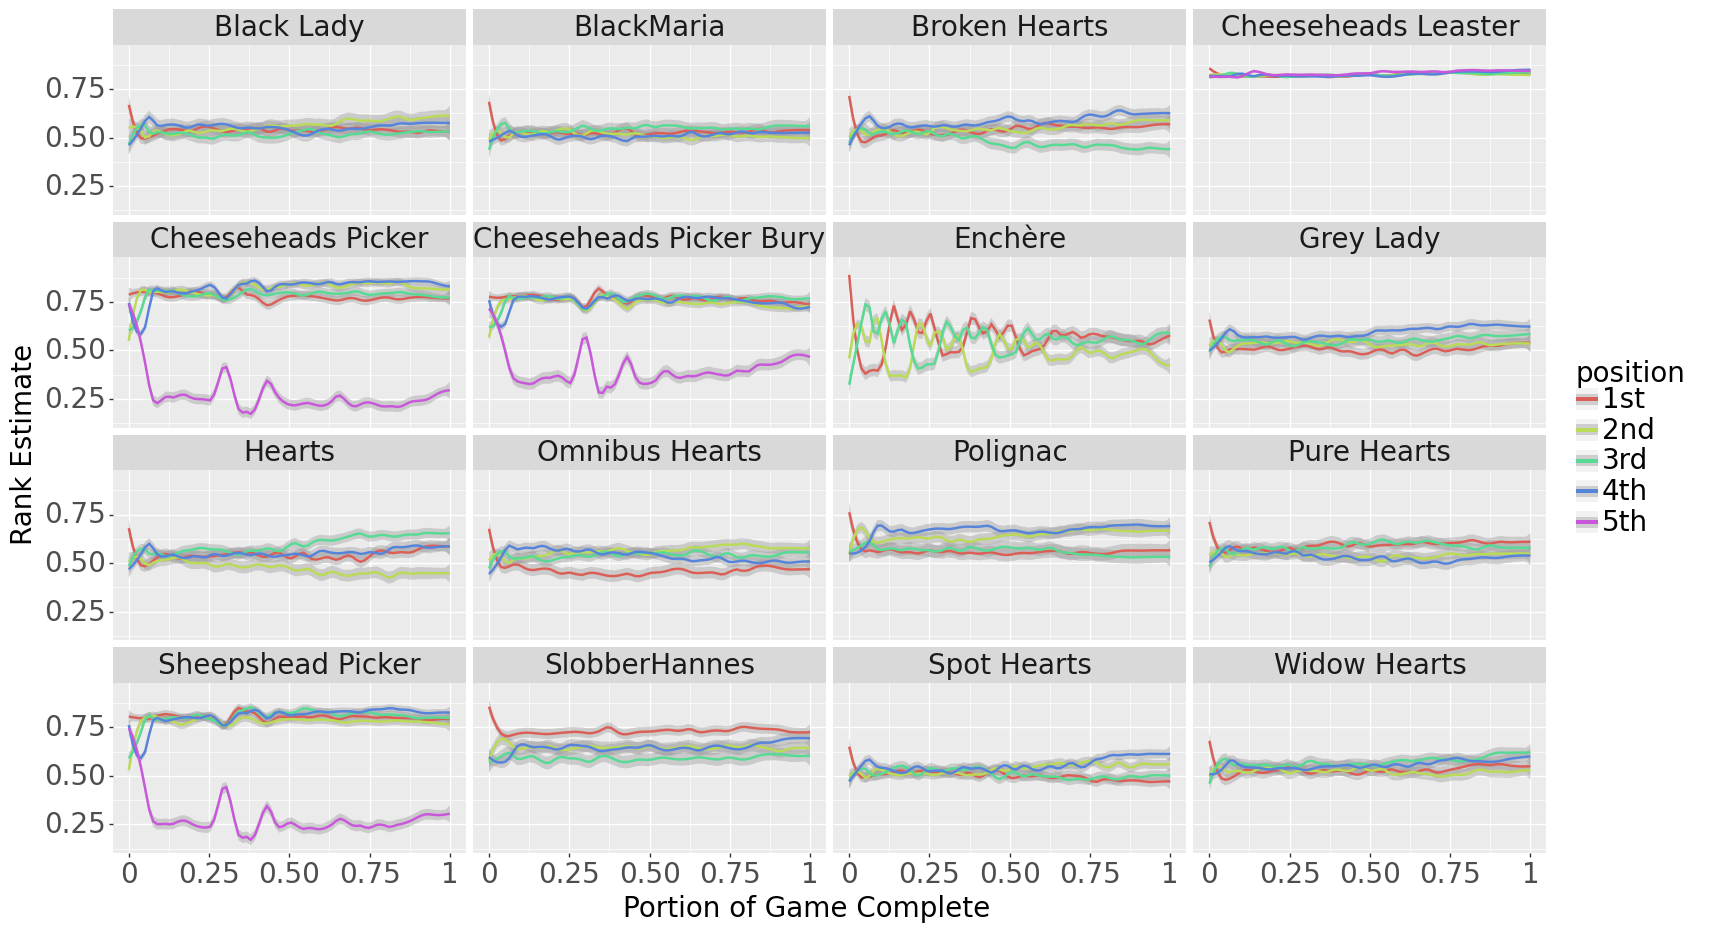

<ggplot: (8775400001476)>

In [ ]:
ggplot(dfave, aes(x="portion", y="estimate", color="position")) + \
geom_smooth(method="loess", span = .1) + \
facet_wrap("game") + \
theme(figure_size=(18.5, 10.5), text=element_text(size=20)) + \
labs(x='Portion of Game Complete', y='Rank Estimate')

# Rank Order

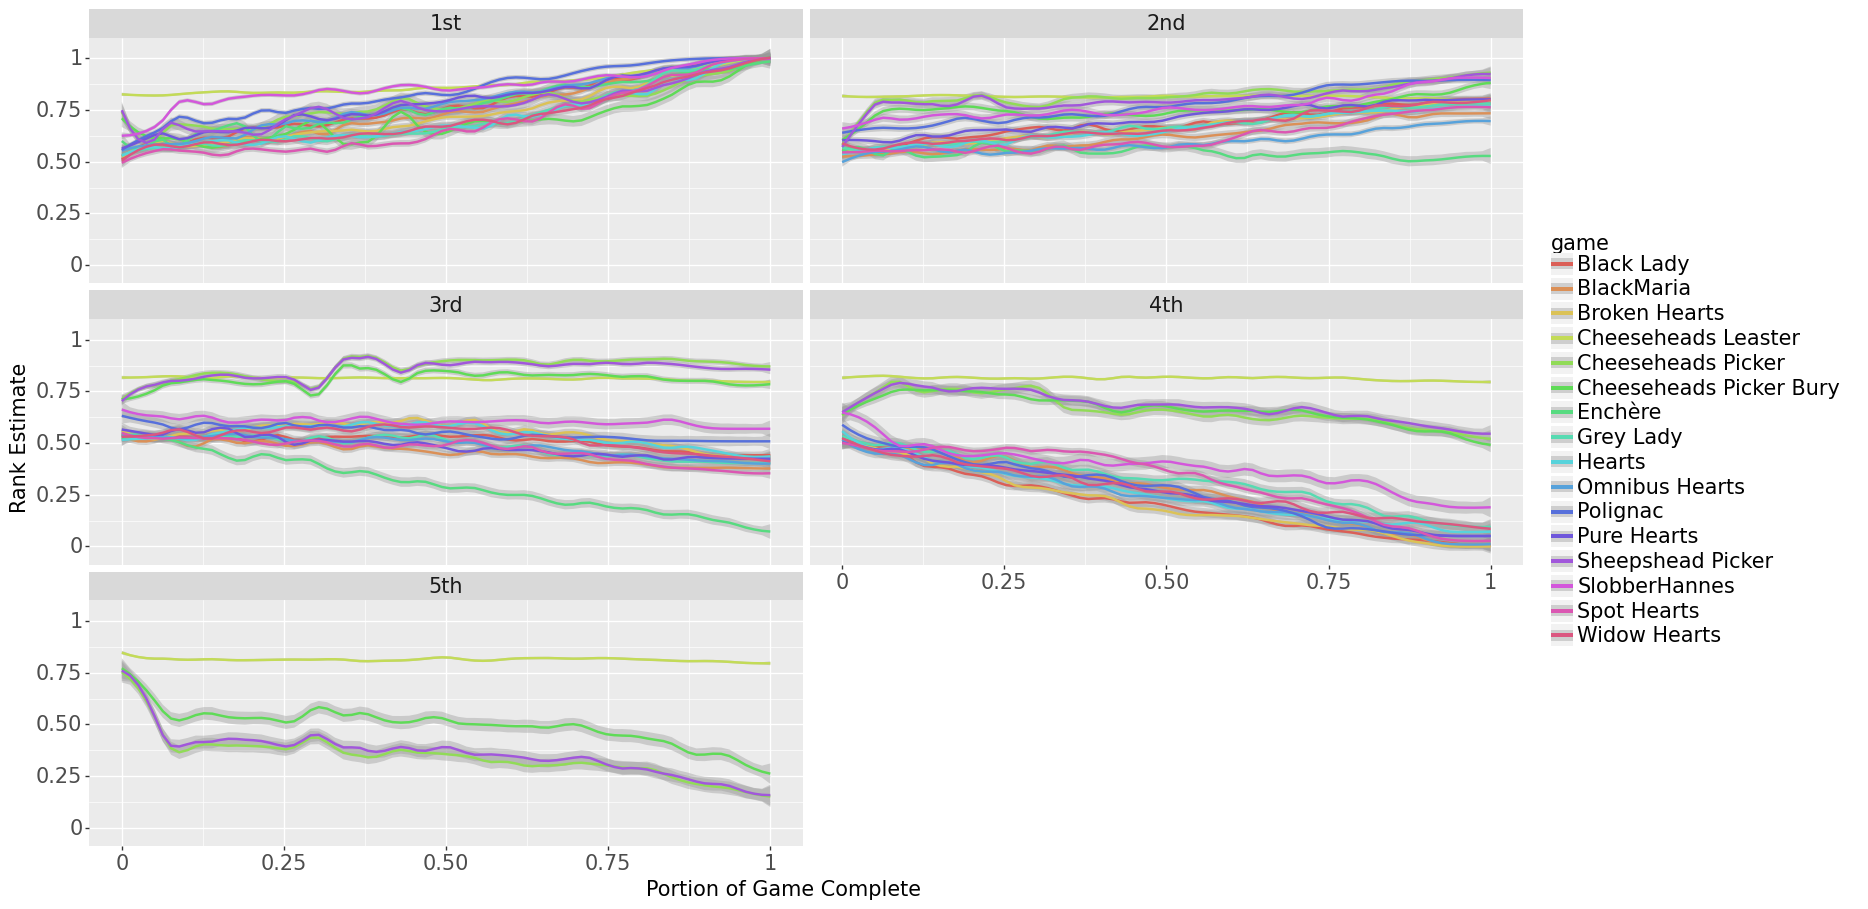

<ggplot: (8767448145622)>

In [ ]:
ggplot(dfave, aes(x="portion", y="estimate", color="game")) + \
geom_smooth(method="loess", span = .1) + \
facet_wrap("rank", ncol=2) + \
theme(figure_size=(18.5, 10.5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') 

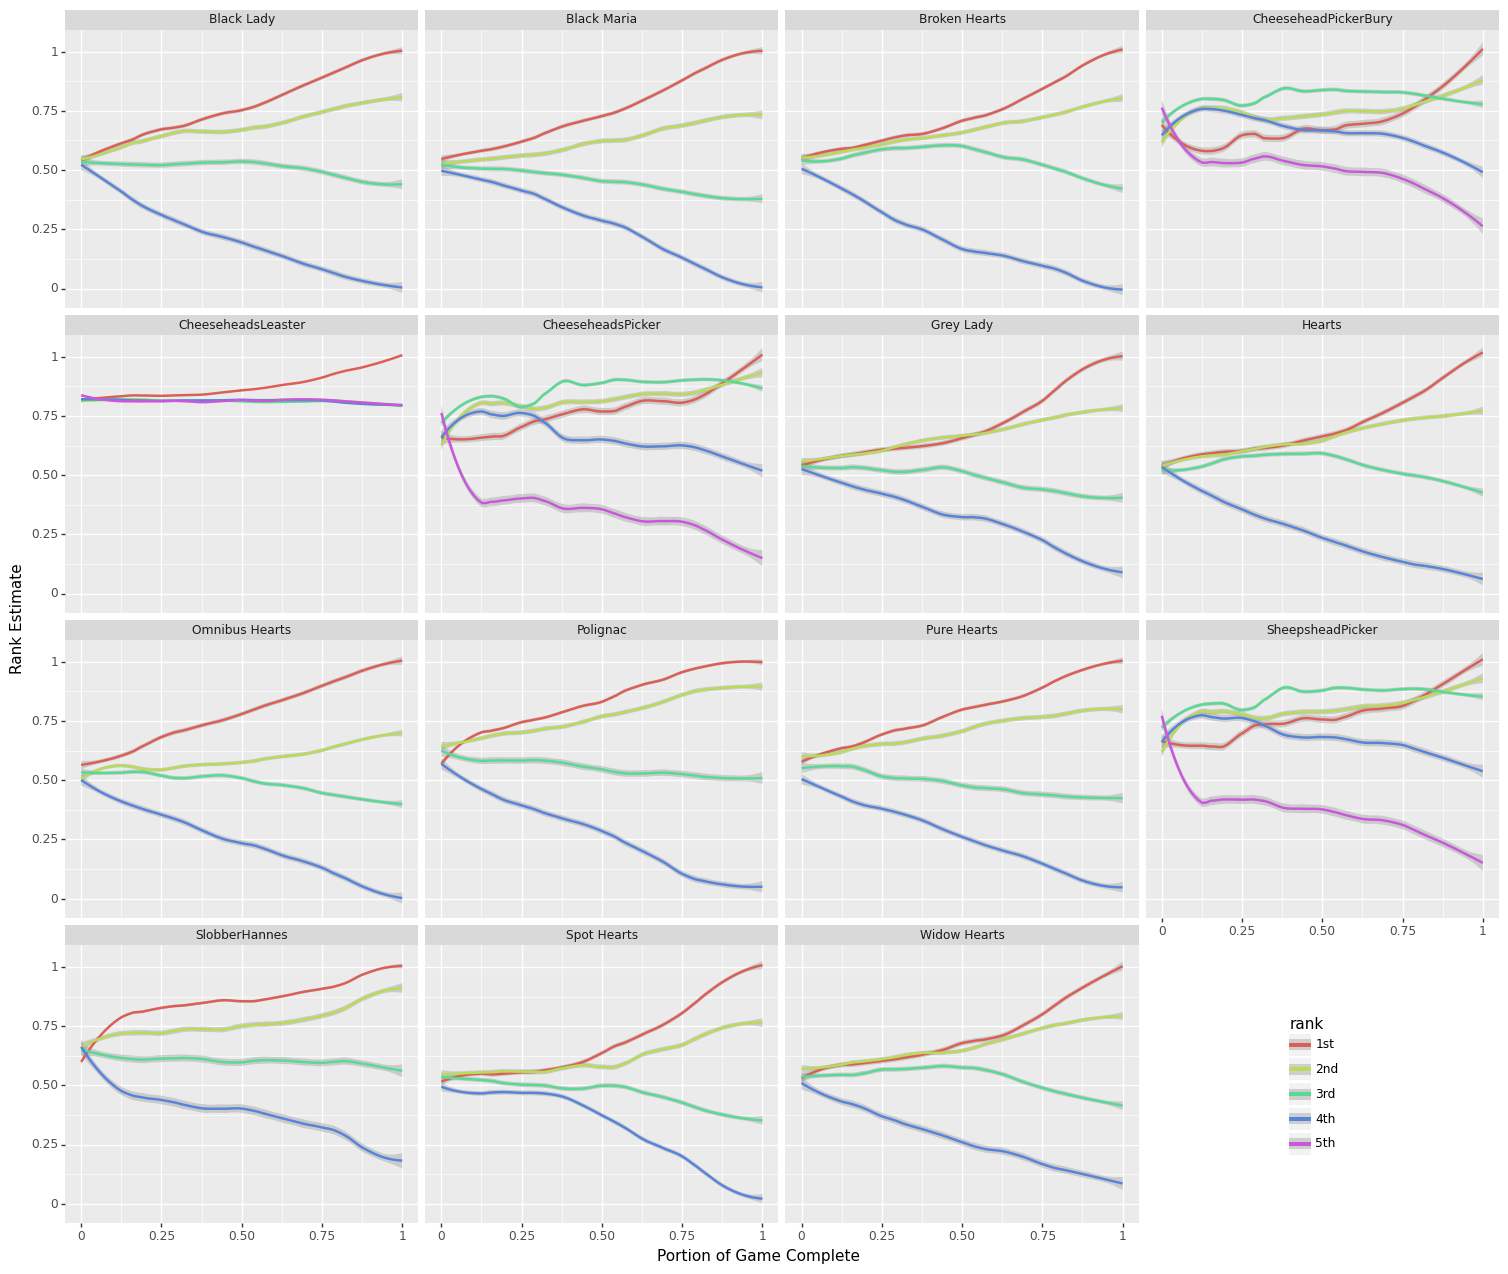

<ggplot: (8788241764943)>

In [ ]:
ggplot(dfave, aes(x="portion", y="estimate", color="rank")) + \
geom_smooth(method="loess", span = .3) + \
facet_wrap("game") + \
theme(figure_size=(18.5, 15.5), legend_position=(.8, .2)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') 

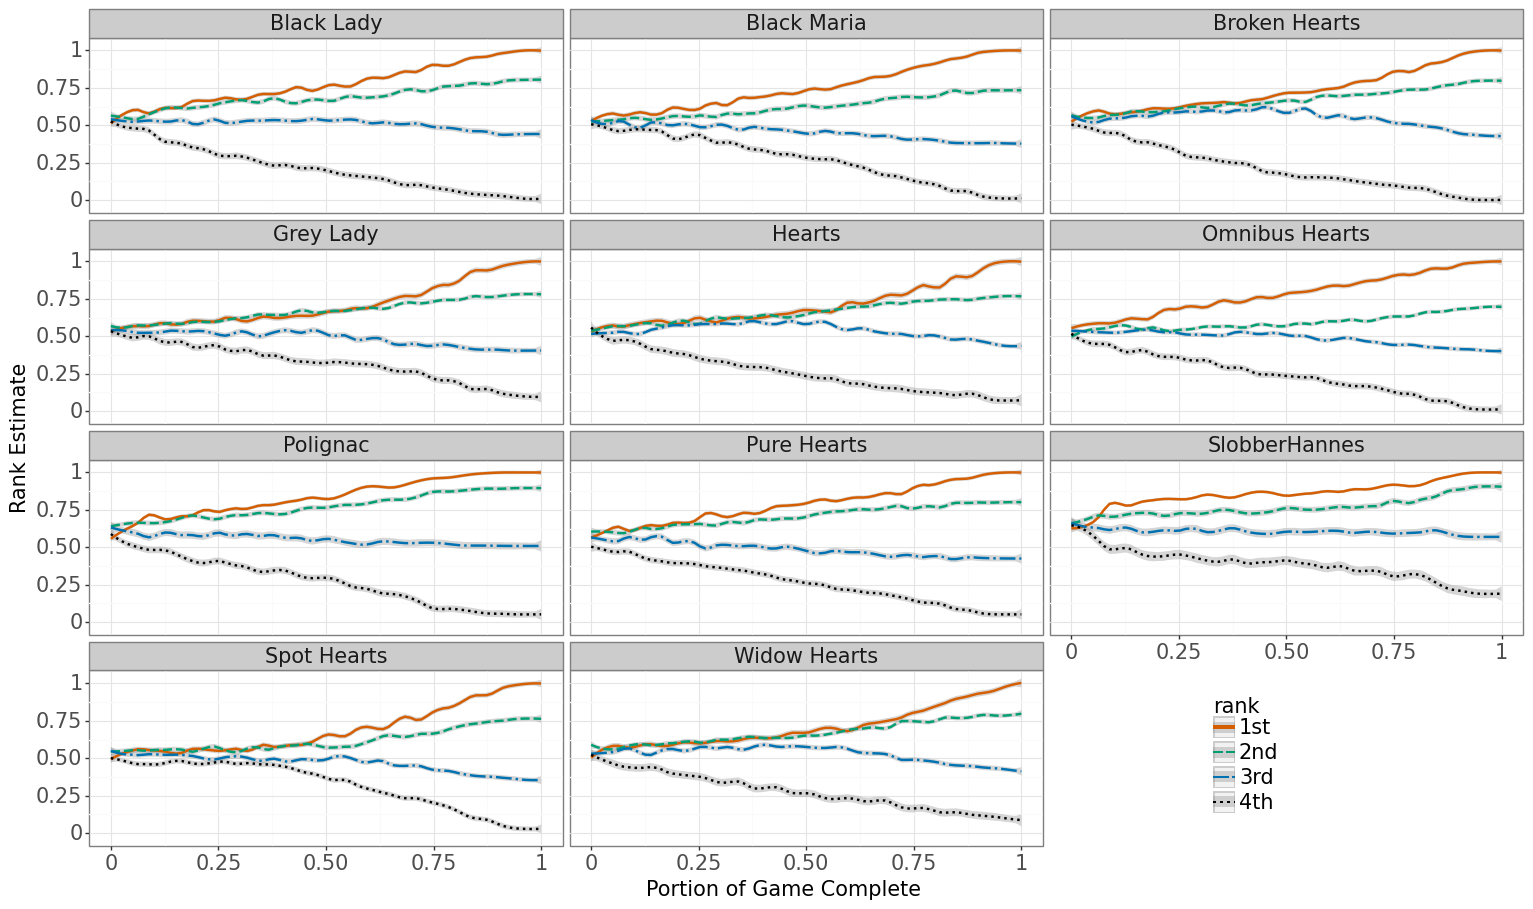

<ggplot: (8767035700068)>

In [ ]:

ggplot(dfave, aes(x="portion", y="estimate", linetype="rank", color="rank")) + \
geom_smooth(method="loess", span = .1) + \
facet_wrap("game", ncol=3) + \
theme_bw() + \
theme(figure_size=(18.5, 10.5), legend_position=(.75, .2), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') + \
scale_colour_manual(values=cbbPalette)

# Game Lead History Average
Define the game in the variable below

/Users/goadrich/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_smooth : Removed 2 rows containing missing values.


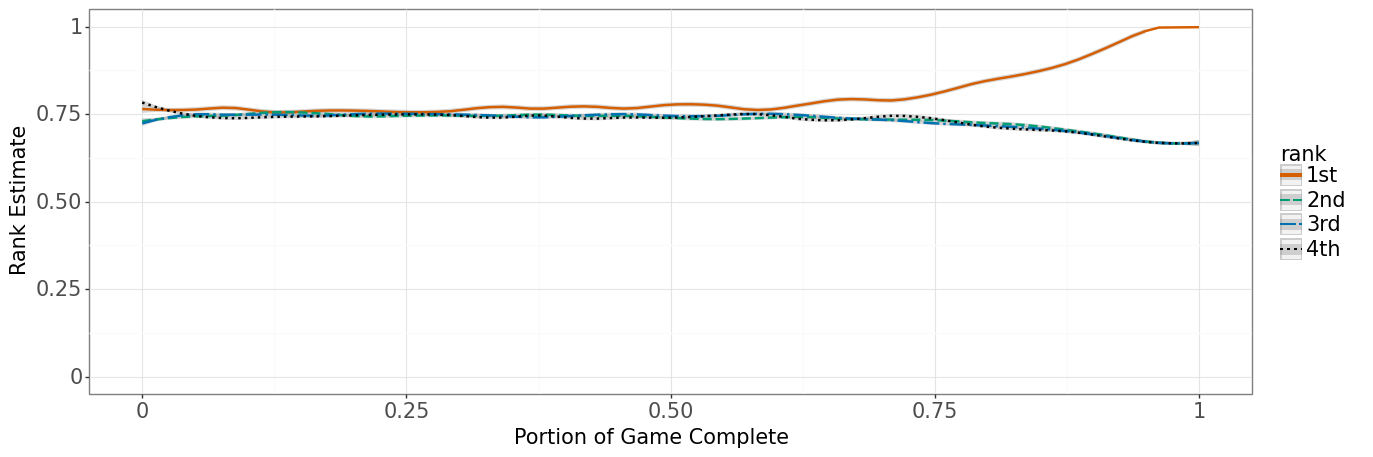

<ggplot: (8767379513634)>

In [27]:
game = "Agram"
ggplot(dfave[(dfave["game"] == game)], aes(x="portion", y="estimate", linetype="rank", color="rank")) + \
geom_smooth(method="loess", span = .1) + \
theme_bw() + \
ylim(0, 1) + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') + \
scale_colour_manual(values=cbbPalette)

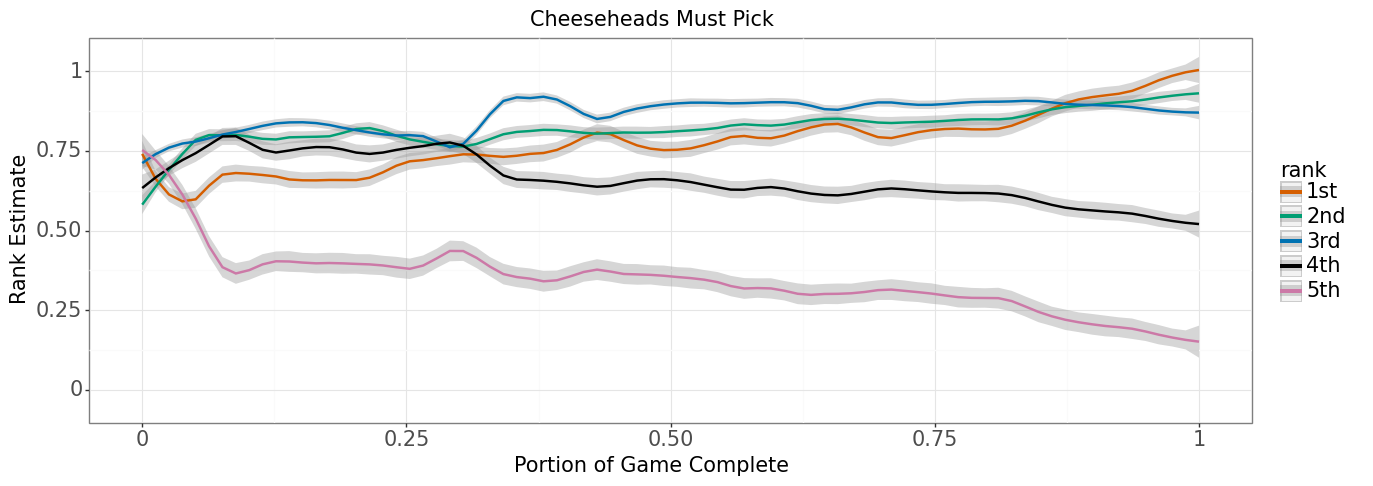

<ggplot: (8788283859134)>

In [154]:
ggplot(dfave[(dfave["game"] == "CheeseheadsPicker")], 
       aes(x="portion", y="estimate", color="rank")) + \
geom_smooth(method="loess", span = .1) + \
theme_bw() + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate', title="Cheeseheads Must Pick") + \
scale_colour_manual(values=cbbPalette) + \
ylim(-0.05, 1.05)

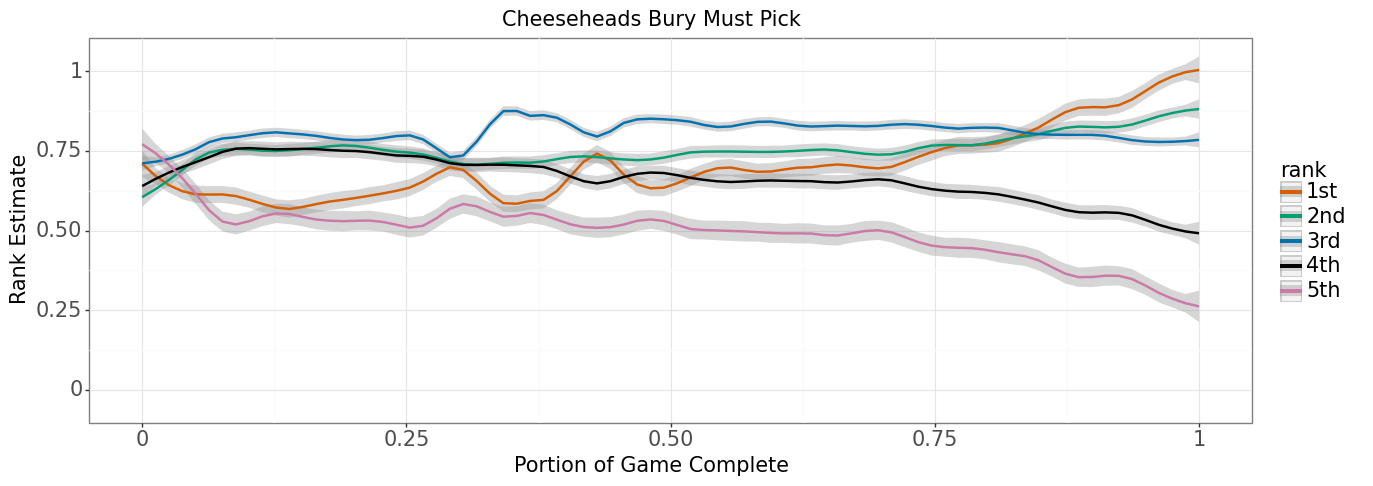

<ggplot: (8788333815366)>

In [155]:
ggplot(dfave[(dfave["game"] == "CheeseheadPickerBury")], 
       aes(x="portion", y="estimate", color="rank")) + \
geom_smooth(method="loess", span = .1) + \
theme_bw() + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate', title="Cheeseheads Bury Must Pick") + \
scale_colour_manual(values=cbbPalette) + \
ylim(-0.05, 1.05)

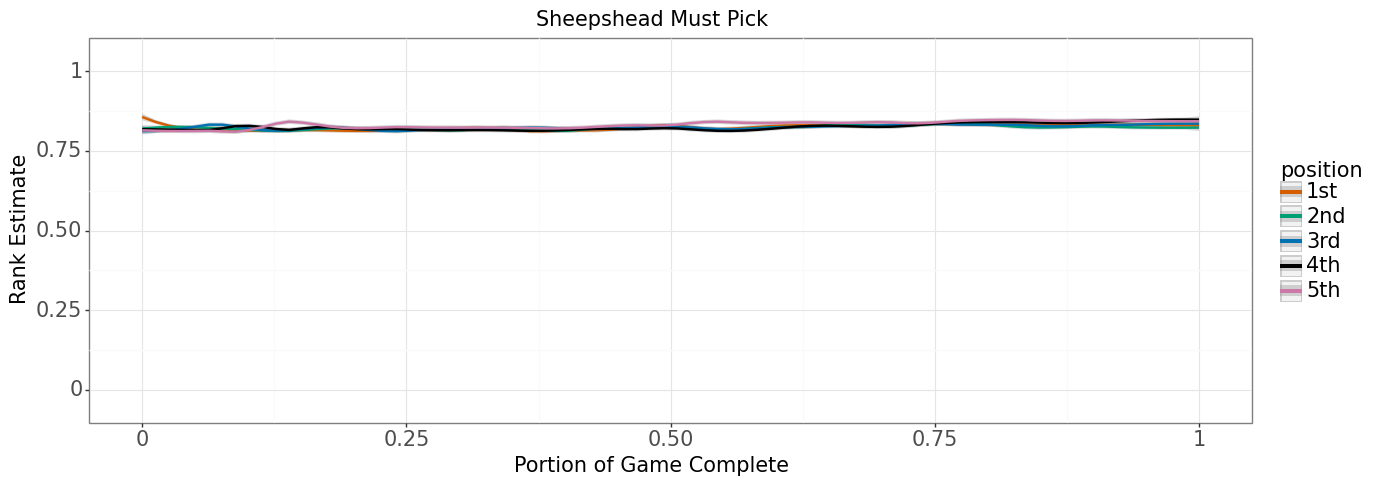

<ggplot: (8788100128639)>

In [184]:
ggplot(dfave[(dfave["game"] == "CheeseheadsLeaster")], 
       aes(x="portion", y="estimate", color="position")) + \
geom_smooth(method="loess", span = .1) + \
theme_bw() + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate', title="Sheepshead Must Pick") + \
scale_colour_manual(values=cbbPalette) + \
ylim(-0.05, 1.05)

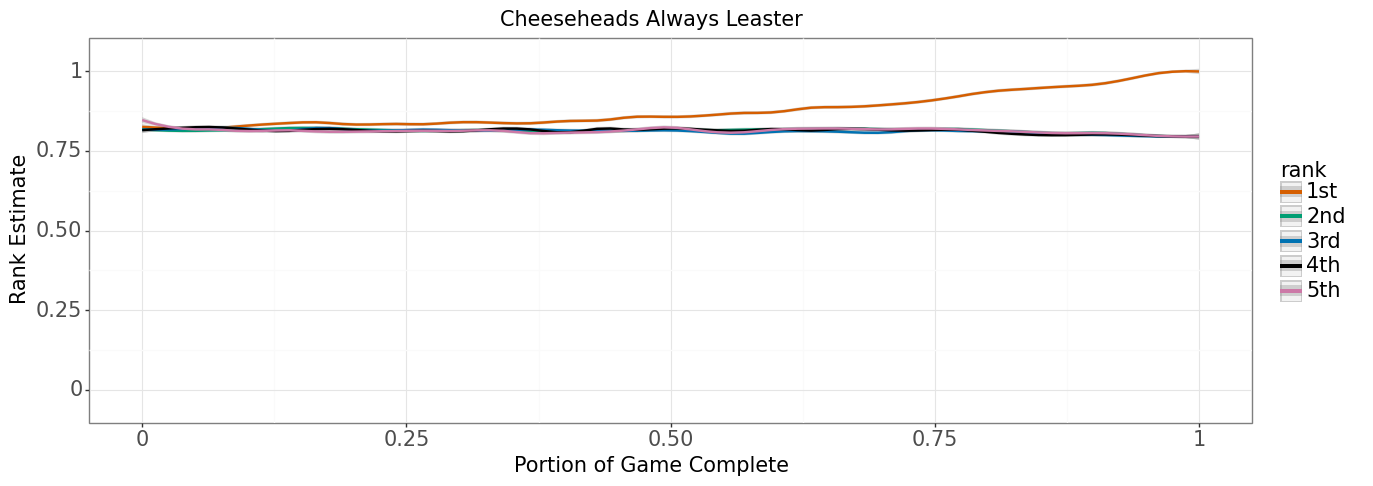

<ggplot: (8788320881957)>

In [143]:
ggplot(dfave[(dfave["game"] == "CheeseheadsLeaster")], 
       aes(x="portion", y="estimate", color="rank")) + \
geom_smooth(method="loess", span = .1) + \
theme_bw() + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate', title="Cheeseheads Always Leaster") + \
scale_colour_manual(values=cbbPalette) + \
ylim(-0.05, 1.05)

# Individual Game Lead History
choose the iteration and game

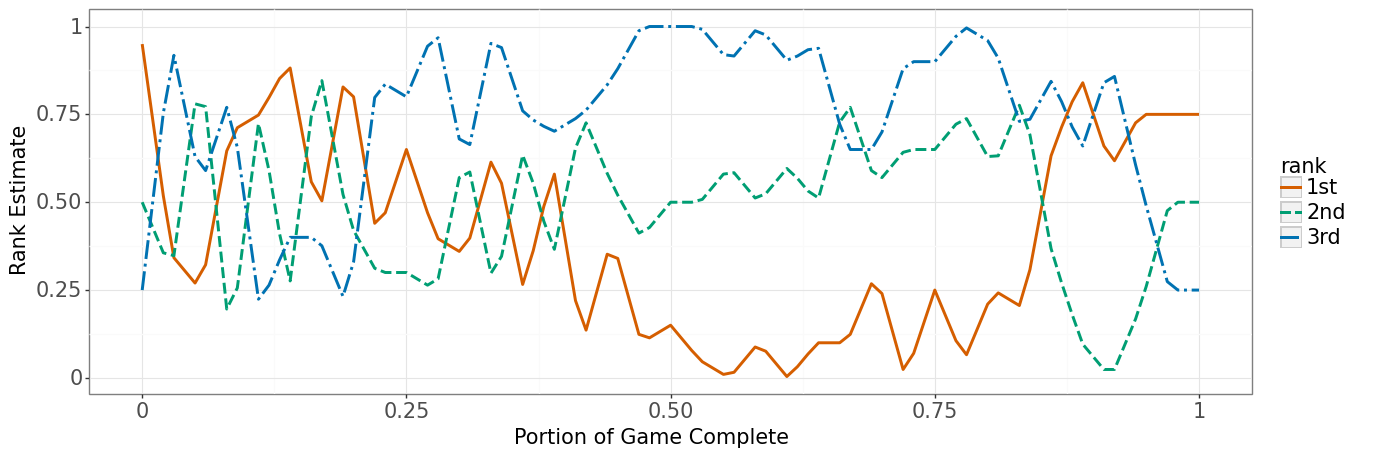

<ggplot: (8775428515922)>

In [ ]:
game = "Enchère"
iter = 7
ggplot(dfave[(dfave["iteration"] == iter) & (dfave["game"] == game)], 
       aes(x="portion", y="estimate", color="rank")) + \
geom_line(aes(linetype = "rank"), size=1.2) + \
theme_bw() + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') + \
scale_colour_manual(values=cbbPalette)

# All Individual Lead Histories

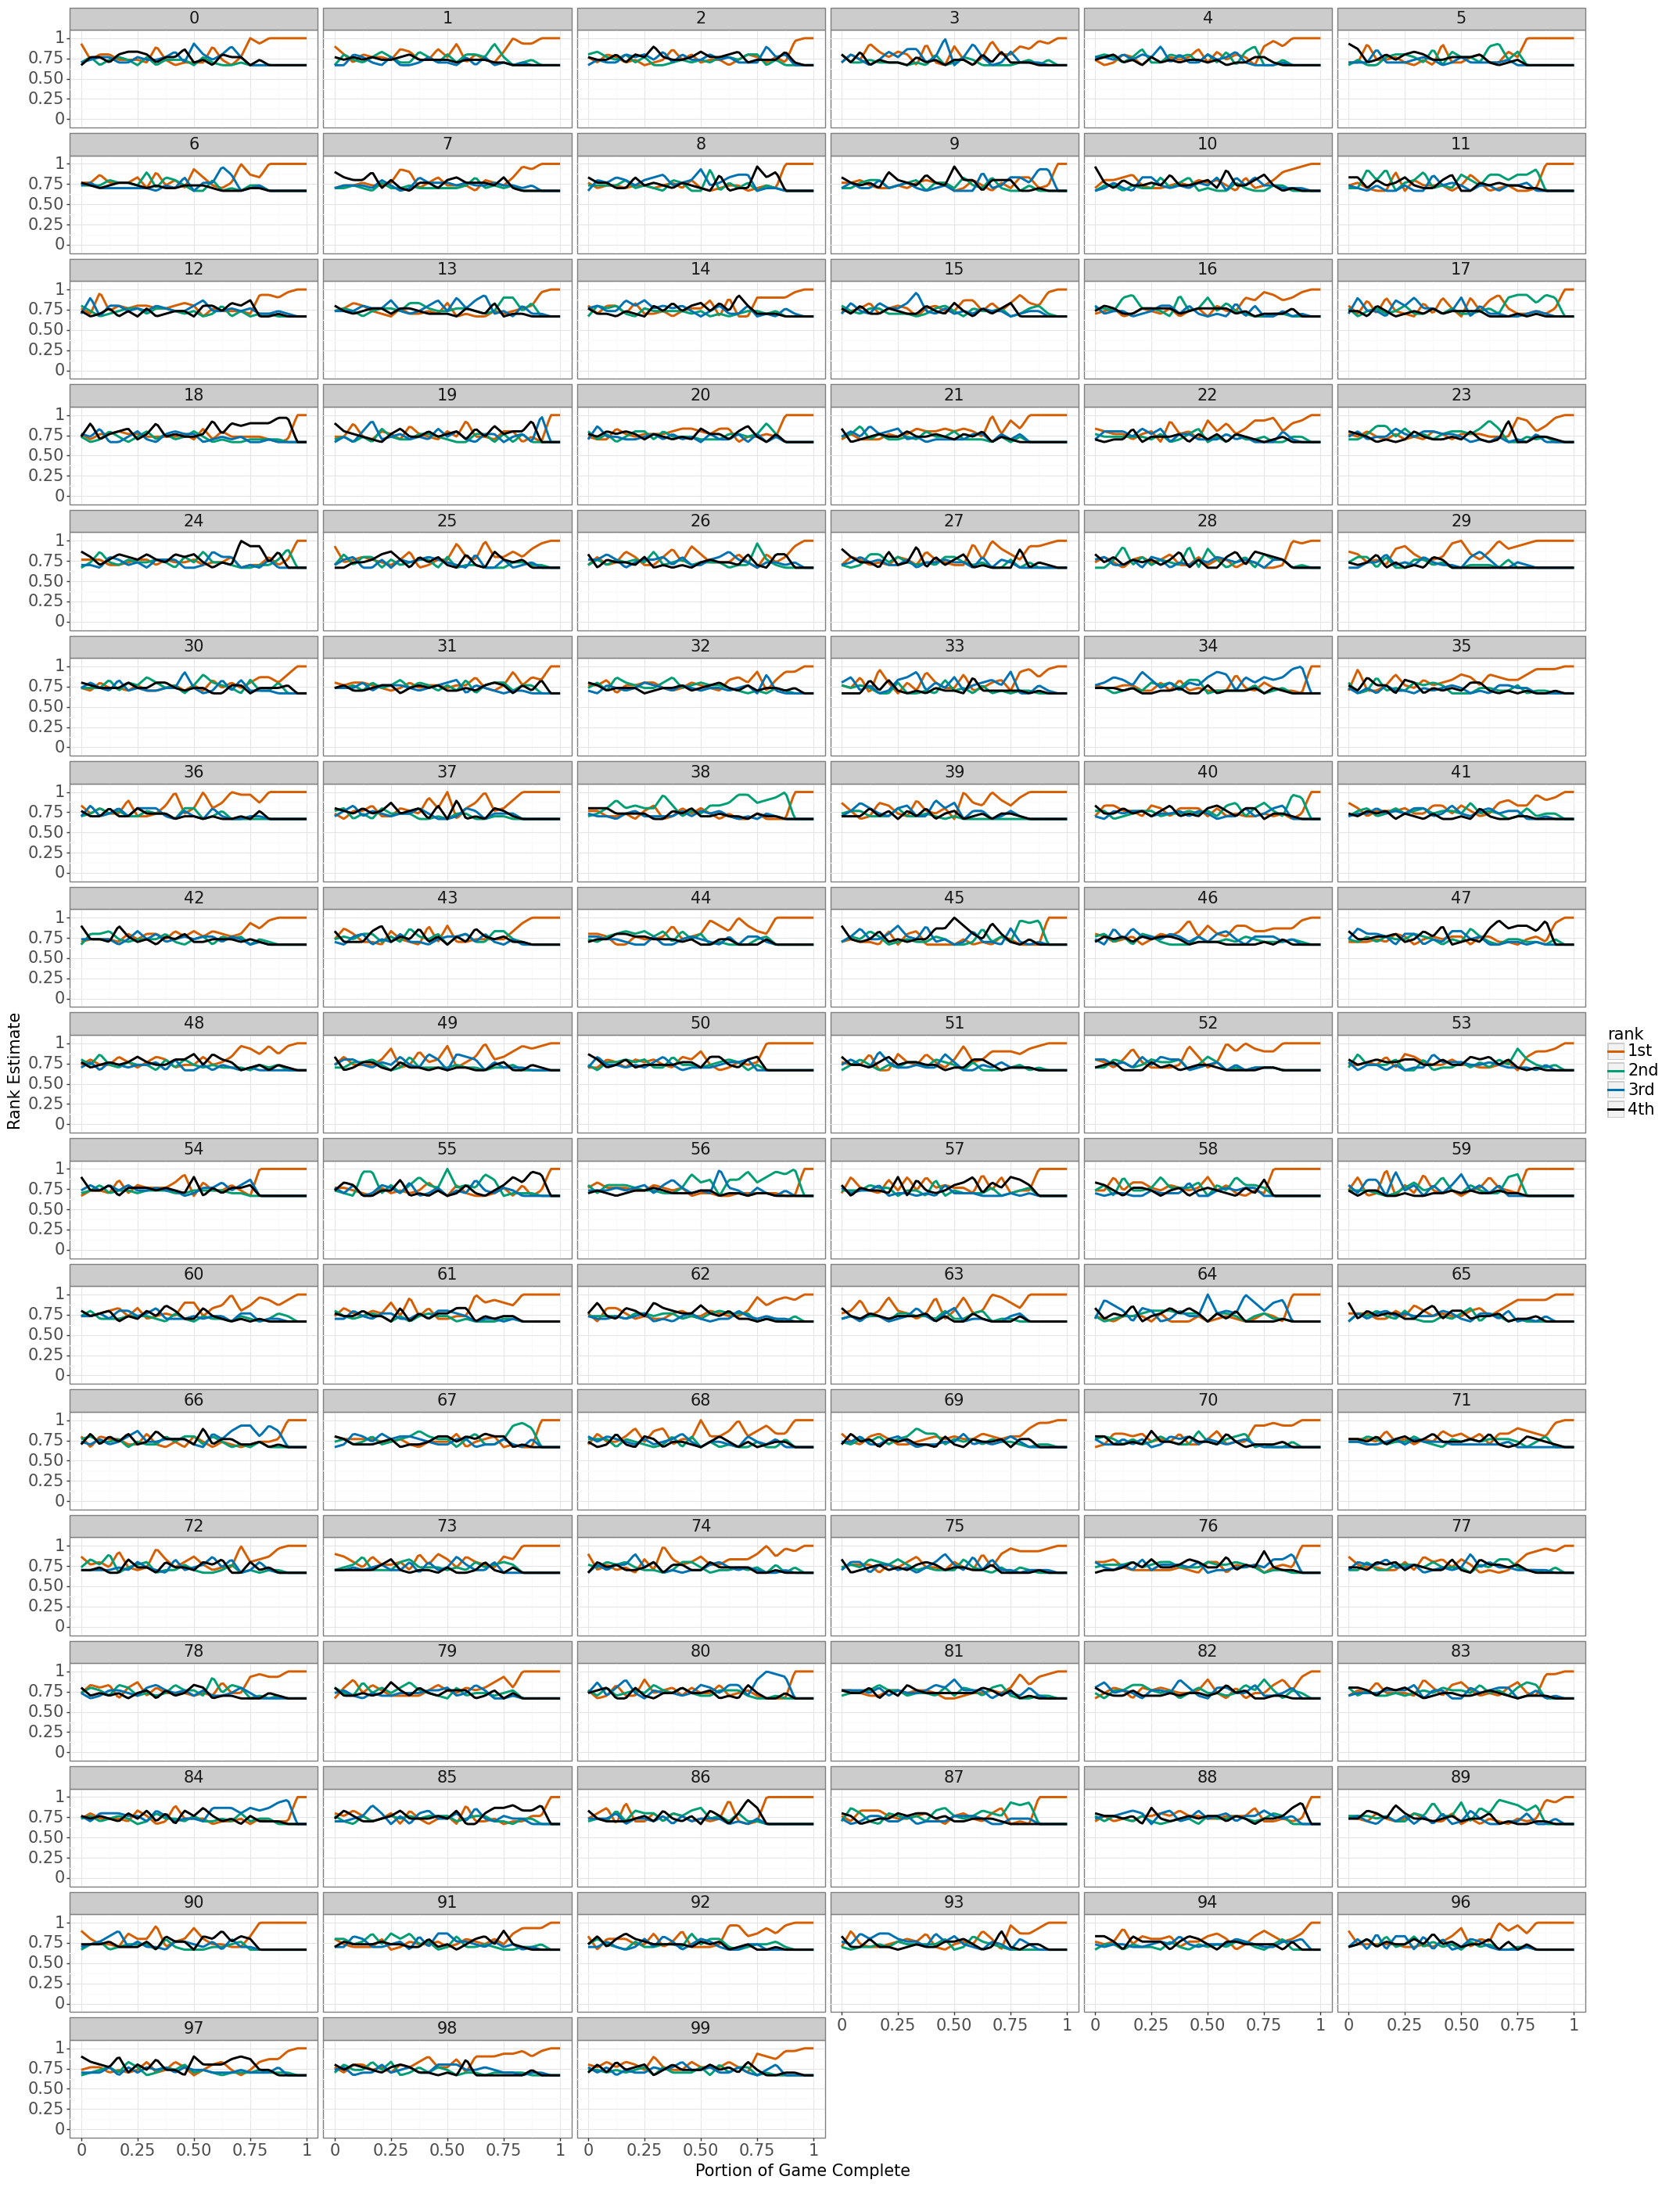

<ggplot: (8767347891839)>

In [28]:
game = "Agram"
ggplot(dfave[dfave["game"] == game], 
   aes(x="portion", y="estimate", color="rank")) + \
geom_line(size=1.2) + \
facet_wrap("iteration", ncol = 6) + \
theme_bw() + \
theme(figure_size=(25, 35), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') + \
scale_colour_manual(values=cbbPalette) + \
ylim(-0.05, 1.05)

In [222]:
def getKey(item):
    return item[0]

#for game in ["Hearts", "HeartsNoMoon", "BlackMariaMoon", "HeartsOmnibus", "Hearts7Q"]:
#for game in ["Polignac", "SlobberHannes", ]:
for nump in range(minP, maxP):
    game = "LAMA"
    dthresh = (1 + (nump - 2) / (nump - 1)) / 2
    colors = ["r", "g", "c", "m", "y", "b"]
    xcolors = ["bright red", "dusty purple", "green", "windows blue", "amber", "greyish",]
    allcolors = sn.xkcd_palette(xcolors)
    places = ["First", "Second", "Third", "Fourth", "Fifth", "Sixth"]
    heuristics["Drama"] = 0
    heuristics["Security"] = 0
    for type in ["AllAI"]:
        
        ropen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
        resdata = ropen.readlines()[5 + nump:]
        ropen.close()
        ranksfull = []
        for d in resdata:
            ranksfull.append([int(x) for x in d.strip().split(",")[:-1]])
        
        fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-leadstats.txt")
        data = fopen.readlines()
        fopen.close()
        preds = [[] for i in range(nump)]
        averages = [np.zeros(100) for i in range(nump)]
    #    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax = plt.figure(figsize=(15,5)).gca()
        plt.title(game + ": " + typename[type])
        plt.xlabel("Portion of Game Complete")
        plt.ylabel("Rank Estimate")
        plt.ylim(0, 1.05)
        count2 = 0
        game = int(data[1].strip()[4:])
        for d in data[2:] + ["game0"]:
            if not d[0].isdigit():
                nextgame = int(d.strip()[4:])
                maxlen = 0
                for p in preds:
                    if len(p) > maxlen:
                        maxlen = len(p)

                #print(preds)
                #print(ranksfull)
                ranks = [(((nump - 1) - ranksfull[i][game]) / (nump - 1), i) for i in range(len(preds))]
                #ranks = [(preds[i][-1], i) for i in range(len(preds))]
                sortedranks = sorted(ranks, key=getKey)
                winner = sortedranks[-1][1]

                colors = ["k", "k", "k", "k", "k", "k"]
                colors[winner] = "r"

                #colors = [allcolors[ranks[x][1]] for x in range(len(preds))]
                
                px = [x / maxlen for x in range(len(preds[0]) + 1)]
                for i in range(len(preds)):
                    #averages[i] += preds[-i-1]
                    
                    f = interp1d(px, preds[sortedranks[i][1]] + [sortedranks[i][0]])
                    #f = interp1d(px, preds[-i-1] + [preds[-i-1][-1]])
                    xnew = np.linspace(0, 1, num=100)
                    ynew = f(xnew)
                    averages[i] += ynew
                    
                    #averages[i] += preds[ranks[i][1]]

                alphas = [0.1] * nump
                alphas[winner] = 0.1
                dcount = 0
                drama = 0
                for s in preds[winner]:
                    if s < dthresh:
                        dcount += 1
                        drama += (dthresh - s) ** 0.5
                if dcount > 0:
                    drama /= dcount
                heuristics["Drama"] += drama / count[type]
                heuristics["Security"] += (1 - dcount /  len(preds[winner])) / count[type]
                #print(count2, 1 - (dcount / len(preds[winner])))

    #            moon = True     
    #            for i in range(len(preds)):
    #                if len(preds[i]) > 0 and i != winner and preds[i][-1] < 0.6:
    #                    moon = False
    #            if moon:
    #                print(count2)

                if count2 >= 0:
                    for c in range(len(preds)):
                        plt.plot([x / maxlen for x in range(len(preds[c]) + 1)], preds[c] + [ranks[c][0]], color=colors[c], alpha=alphas[c], linewidth=1.0)
                    

                preds = [[] for i in range(nump)]
                count2 += 1
                game = nextgame
            else:
                leads = [float(x) for x in d[:-2].strip().split(",")]
                for p in range(nump):
                    preds[p].append(leads[p + 1])
        plt.axhline(dthresh, color="k", ls="dashed", linewidth=1)


FileNotFoundError: [Errno 2] No such file or directory: '../CardStockXam/bin/Release/games/LAMA4.gdlAllAI-resultsstats.txt'

In [15]:
game = "LAMA"
nump = 5
dthresh = (1 + (nump - 2) / (nump - 1)) / 2
colors = ["r", "g", "c", "m", "y"]
heuristics["Drama"] = 0
heuristics["Security"] = 0
for type in ["AllAI"]:
    fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-leadstats.txt")
    data = fopen.readlines()
    fopen.close()
    preds = [[], [], [], [], []]
    ax = plt.figure(figsize=(15,5)).gca()
#    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(game + ": " + typename[type])
    plt.xlabel("Portion of Game Complete")
    plt.ylabel("Rank Estimate")
    plt.ylim(0, 1.05)
    count2 = 0
    for d in data[2:]:
        if not d[0].isdigit():

            maxlen = 0
            for p in preds:
                if len(p) > maxlen:
                    maxlen = len(p)
                    
            winner = 0
            winscore = 0
            for i in range(len(preds)):
                if len(preds[i]) > 0 and preds[i][-1] > winscore:
                    winner = i
                    winscore = preds[i][-1]

            colors = ["k", "k", "k", "k", "k"]
            colors[winner] = "r"
            alphas = [0.1, 0.1, 0.1, 0.1, 0.1]
            alphas[winner] = 0.1
            dcount = 0
            drama = 0
            for s in preds[winner]:
                if s < dthresh:
                    dcount += 1
                    drama += (dthresh - s) ** 0.5
            if dcount > 0:
                drama /= dcount
            heuristics["Drama"] += drama / count[type]
            heuristics["Security"] += (1 - dcount /  len(preds[winner])) / count[type]
            #print(count2, 1 - (dcount / len(preds[winner])))

            moon = True     
            for i in range(len(preds)):
                if len(preds[i]) > 0 and i != winner and preds[i][-1] < 0.6:
                    moon = False
            if moon:
                print(count2)

            if count2 >= 0:
                c = 0 
                plt.plot([x / maxlen for x in range(len(preds[0]))], preds[0], color=colors[c], alpha=alphas[c], linewidth=1.0)
                for plist in preds[1:]:
                    c += 1
                    plt.plot([x / maxlen for x in range(len(plist))], plist, color=colors[c], alpha=alphas[c], linewidth=1.0)
                    pass
                plt.axhline(dthresh, color="b", ls="dashed")
            preds = [[], [], [], [], []]
            count2 += 1
        else:
            leads = [float(x) for x in d[:-2].strip().split(",")]
            for p in range(nump):
                preds[p].append(leads[p + 1])
    


FileNotFoundError: [Errno 2] No such file or directory: '../CardStockXam/bin/Release/games/LAMA5.gdlAllAI-leadstats.txt'

In [78]:
### type = "RndandAI"
w = 0.4
fpw = []
fpwerr = []
nl = []
nlerr = []
for nump in range(minP, maxP):
    fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()
    score = []
    rank = []
    ranks = []
    allrank = []
    for i in range(nump):
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        score.append(sum(scores) / count[type])
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])
        allrank.extend(ranks[i])
        rank.append(sum(ranks[i]) / count[type])
    maxr = np.max(allrank)
    fpw.append(len([x for x in ranks[0] if x == 0]) / count[type])
    nl.append(len([x for x in ranks[0] if x != maxr]) / count[type])

    vals = []
    v2 = []
    for j in range(epoch):
        x = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x == 0]) / (count[type]/epoch)
        vals.append(x)
        y = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x != maxr]) / (count[type]/epoch)
        v2.append(y)
    fpwerr.append(np.std(vals))
    nlerr.append(np.std(v2))

expected = [1 / x for x in range(2, len(fpw) + 2)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.bar([x - w/2 for x in range(2, len(fpw) + 2)], fpw, width=w)
plt.bar([x + w/2 for x in range(2, len(fpw) + 2)], expected, width=w, color="r")
plt.errorbar([x - w/2 for x in range(2, len(fpw) + 2)], fpw, yerr=fpwerr, fmt='none', capsize=4, color="k")
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.legend(["AI", "Random"], loc=1)
plt.title(game + " AI Win Rate")

expected = [(x - 1) / x for x in range(2, len(fpw) + 2)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1.1)
plt.bar([x - w/2 for x in range(2, len(fpw) + 2)], nl, width=w)
plt.bar([x + w/2 for x in range(2, len(fpw) + 2)], expected, width=w, color="r")
plt.errorbar([x - w/2 for x in range(2, len(fpw) + 2)], nl, yerr=nlerr, fmt='none', capsize=4, color="k")
plt.xlabel("Number of Players")
plt.ylabel("Nonloss Probability")
plt.title(game + " AI Nonloss Rate")
plt.legend(["AI", "Random"])

FileNotFoundError: [Errno 2] No such file or directory: '../CardStockXam/bin/Release/games/LAMA4.gdlAllAI-resultsstats.txt'

0.3866666666666667


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

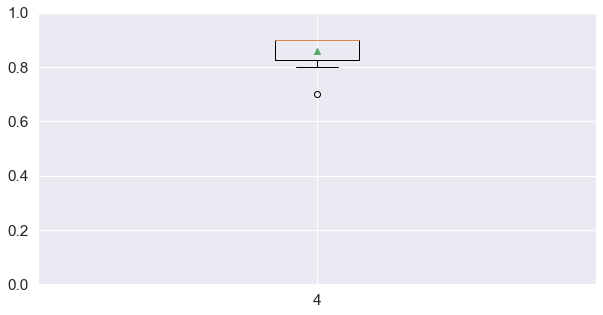

In [8]:
type = "RndandAI"
game = "Hearts"
w = 0.4
fpw = []
fpwerr = []
nl = []
nlerr = []
vals2 = []
wvals = []
for nump in range(minP, maxP):
    fopen = open("../CardStockXam/bin/Release3/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()
    score = []
    rank = []
    ranks = []
    allrank = []
    for i in range(nump):
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        score.append(sum(scores) / count[type])
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])
        allrank.extend(ranks[i])
        rank.append(sum(ranks[i]) / count[type])
    maxr = np.max(allrank)
    fpw.append(len([x for x in ranks[0] if x == 0]) / count[type])
    nl.append(len([x for x in ranks[0] if x != maxr]) / count[type])

    vals = []
    v2 = []
    for j in range(epoch):
        x = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x == 0]) / (count[type]/epoch)
        vals.append(x)
        y = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x != maxr]) / (count[type]/epoch)
        v2.append(y)
    fpwerr.append(np.std(vals))
    nlerr.append(np.std(v2))
    wvals.append(vals)
    vals2.append(v2)
    wsize = 1 - 1 / nump
    print(((sum(vals) / len(vals)) - (1 / nump)) / wsize)
    if nump == 4:
        heuristics["Order"] = ((sum(vals) / len(vals)) - (1 / nump)) / wsize

ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.boxplot(vals2, labels=range(minP, maxP), showmeans=True)
plt.plot(range(1, maxP - 1), [(x - 1) / x for x in range(minP, len(fpw) + (minP))])
plt.xlabel("Number of Players")
plt.ylabel("Nonloss Probability")
plt.title(game + " AI Nonloss Rate")

ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.boxplot(wvals, labels=range(minP, maxP), showmeans=True)
plt.plot(range(1, (maxP - 1)) , [1 / x for x in range(minP, len(fpw) + (minP))])
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.title(game + " AI Win Rate")

5.9799999999999995
10.489999999999995
18.17000000000001
23.890000000000008
32.78
7.340000000000002
13.029999999999989
19.890000000000004
25.490000000000002
33.66000000000001
10.680000000000003
15.570000000000006
23.399999999999995
28.919999999999998
34.03


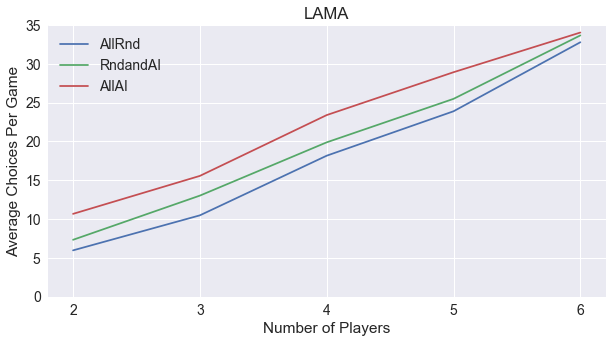

In [96]:
game = "LAMA"
w = 0.3
plt.figure(figsize=(10,5))
avechoices = {}
ac = -1
for type in ["AllRnd", "RndandAI", "AllAI"]:
    avechoices[type] = []
    for nump in range(minP, maxP):
        fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-choicestats.txt")
        data = fopen.readlines()
        fopen.close()
        ave = 0
        for i in range(2, len(data[1:302]), 3):
            choices = [int(x) for x in data[i][:-2].strip().split(",")]
            #print(len(choices))
            ave += len(choices) / count[type]
        print(ave)
        avechoices[type].append(ave)
    plt.plot(range(minP, maxP), avechoices[type])
    #plt.bar([x + (ac * w) for x in range(minP, maxP)], avechoices[type], width=w)
    ac += 1
plt.xticks(range(minP, maxP), range(minP, maxP))
plt.title(game)
plt.ylabel("Average Choices Per Game")
plt.xlabel("Number of Players")
plt.ylim(0, 35)
plt.legend(["AllRnd", "RndandAI", "AllAI"], loc=2)

12.450000000000003
35.63000000000002
11.899999999999993
35.07000000000001
10.659999999999997
38.51999999999999


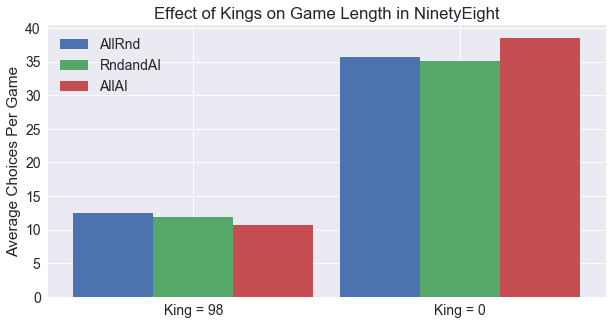

In [19]:
w = 0.3
plt.figure(figsize=(10,5))
avechoices = {}
ac = -1
for type in ["AllRnd", "RndandAI", "AllAI"]:
    avechoices[type] = []
    for name in ["NinetyEight", "NinetyEightNoKing"]:
        fopen = open("../CardStockXam/bin/Release/games/" + name + str(4) + ".gdl" + type + "-choicestats.txt")
        data = fopen.readlines()
        fopen.close()
        ave = 0
        for i in range(2, len(data[1:302]), 3):
            choices = [int(x) for x in data[i][:-2].strip().split(",")]
            #print(len(choices))
            ave += len(choices) / count[type]
        print(ave)
        avechoices[type].append(ave)
    plt.bar([x + (ac * w) for x in range(2, 4)], avechoices[type], width=w)
    plt.xticks(range(2, 4), ["King = 98", "King = 0"])
    ac += 1
plt.title("Effect of Kings on Game Length in NinetyEight")
plt.ylabel("Average Choices Per Game")
plt.legend(["AllRnd", "RndandAI", "AllAI"], loc=2)

0 2
7
1 2
8
0 3
8
1 3
9
2 3
10
0 4
9
1 4
10
2 4
11
3 4
12
0 5
10
1 5
11
2 5
12
3 5
13
4 5
14
0 6
11
1 6
12
2 6
13
3 6
14
4 6
15
5 6
16


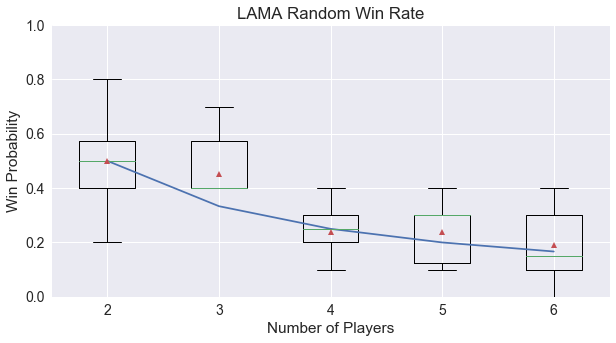

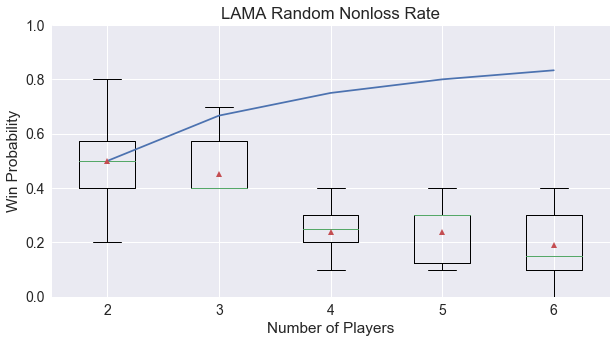

In [88]:
game = "LAMA"
type = "AllRnd"
w = 0.4
fpw = []
fpwerr = []
nl = []
nlerr = []
wvals = []

for nump in range(minP, maxP):
    fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()
    score = []
    rank = []
    ranks = []
    allrank = []
    for i in range(nump):
        print(i, nump)
        print(4 + nump + 1 + i)
        #print(data)
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        score.append(sum(scores) / count[type])
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])
        allrank.extend(ranks[i])
        rank.append(sum(ranks[i]) / count[type])
    maxr = np.max(allrank)
    fpw.append(len([x for x in ranks[0] if x == 0]) / count[type])
    nl.append(len([x for x in ranks[0] if x != maxr]) / count[type])

    vals = []
    v2 = []
    for j in range(epoch):
        x = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x == 0]) / (count[type]/epoch)
        vals.append(x)
        y = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x != maxr]) / (count[type]/epoch)
        v2.append(y)
    fpwerr.append(np.std(vals))
    nlerr.append(np.std(v2))
    wvals.append(vals)

expected = [1 / x for x in range(minP, len(fpw) + minP)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.boxplot(wvals, labels=range(minP, maxP), showmeans=True)
plt.plot(range(1, maxP - 1), expected)
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.title(game + " Random Win Rate")

expected = [(x - 1) / x for x in range(minP, len(fpw) + minP)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.boxplot(wvals, labels=range(minP, maxP), showmeans=True)
plt.plot(range(1, maxP - 1), expected)
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.title(game + " Random Nonloss Rate")



In [245]:
fpwerr

[0.18330302779823363]

In [246]:
rank

[1.33, 1.33, 1.45, 1.49]

{'Convergence': 0.57627041554071889, 'Drama': 0.5264975632233821, 'Security': 0.0771000531778094, 'Order': 0.5333333333333333, 'Fairness': 0.88, 'MeaningfulMoves': 0.17514183165451}


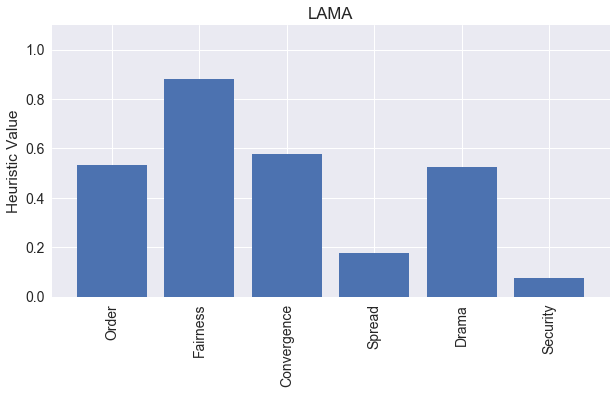

In [152]:
fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl-heuristics.txt")
data = fopen.readlines()
fopen.close()
names = []
values = []
for line in data:
    h = line.strip().split("\t")
    names.append(h[0])
    values.append(float(h[1]))
    if (names[-1] in ["MeaningfulMoves", "Fairness"]):
        heuristics[names[-1]] = values[-1]
plt.figure(figsize=(10,5))
newnames = ["Order", "Fairness", "Convergence", "Spread", "Drama", "Security"]
newvalues = []
for n in newnames:
    if n == "Spread":
        newvalues.append(heuristics["MeaningfulMoves"])
    else:
        newvalues.append(heuristics[n])
plt.bar(range(len(heuristics)), newvalues)
plt.xticks(range(len(heuristics)), newnames, rotation="vertical")
plt.title(game)
plt.ylabel("Heuristic Value")
plt.ylim(0, 1.1)
print(heuristics)


Hearts
0.3866666666666667
HeartsNoMoon
0.4666666666666666
BlackMaria
0.2933333333333334
BlackLady
0.37333333333333335
HeartsOmnibus
0.3866666666666667
Hearts7Q
0.4133333333333331
Polignac
0.48
SlobberHannes
0.6933333333333334
PureHearts
0.42666666666666675
WidowHearts
0.4133333333333331
SpotHearts
0.5199999999999999


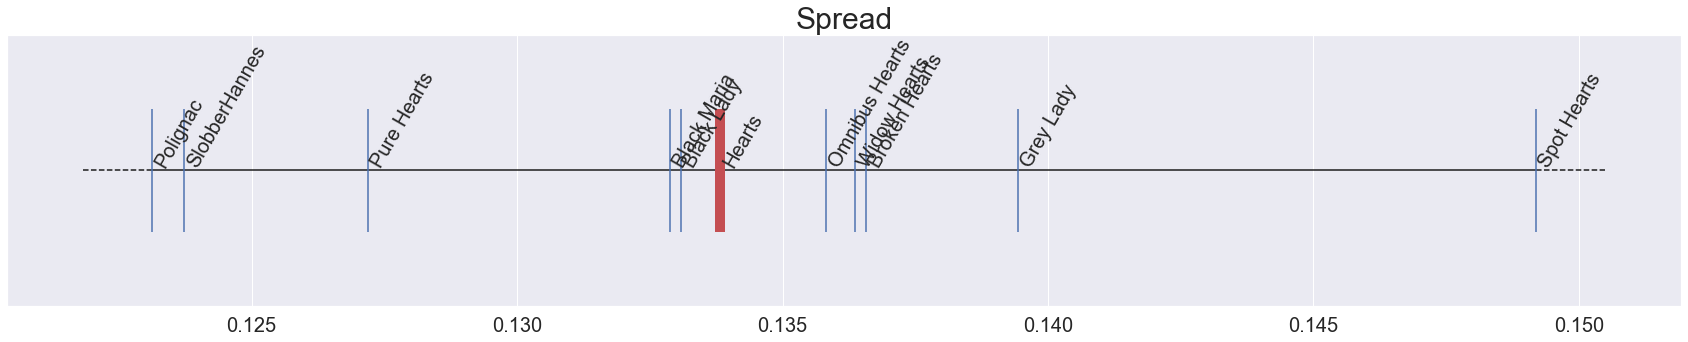

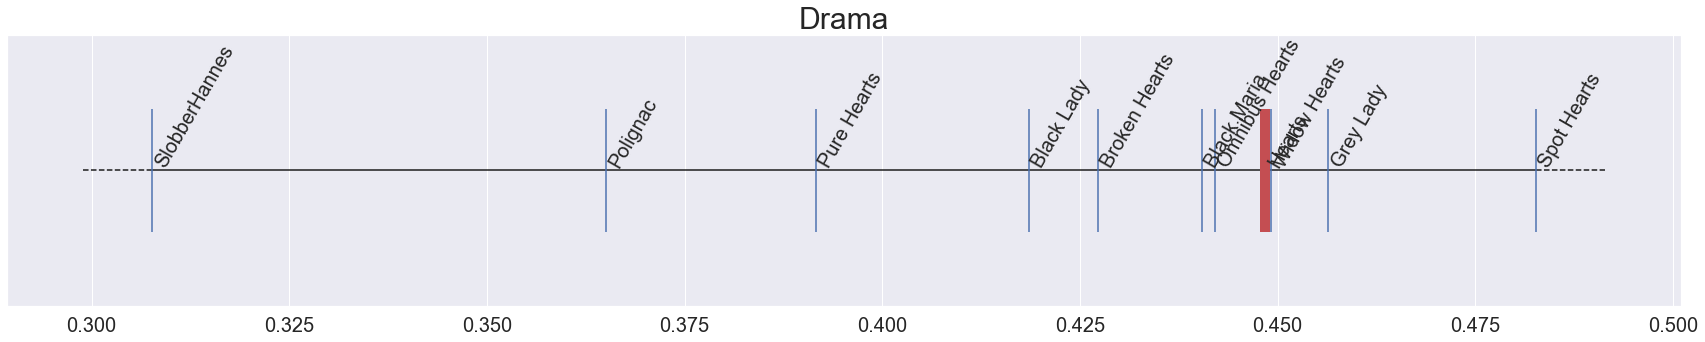

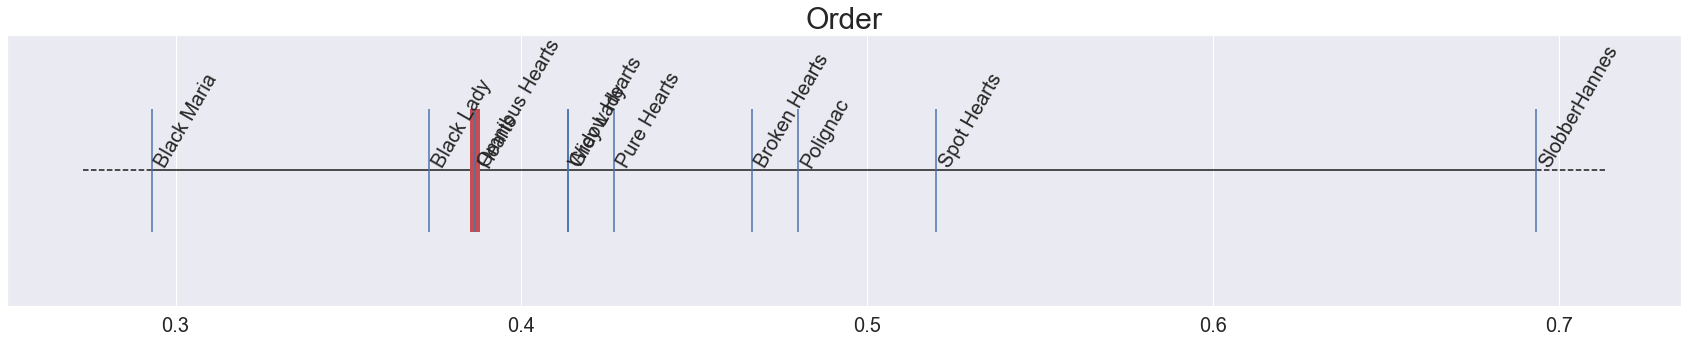

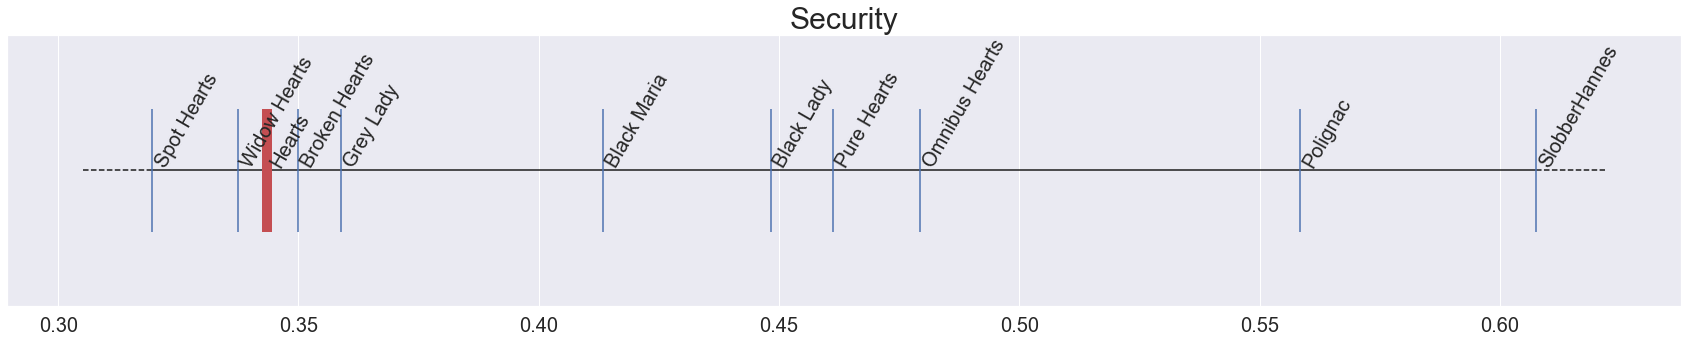

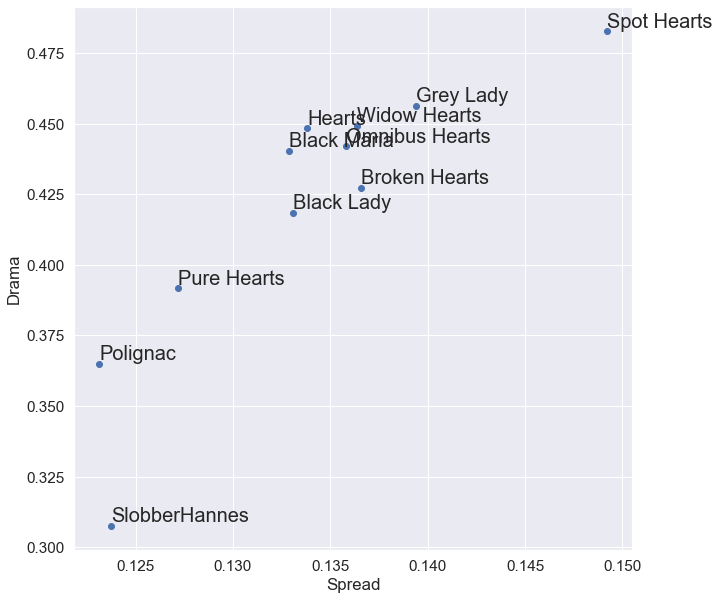

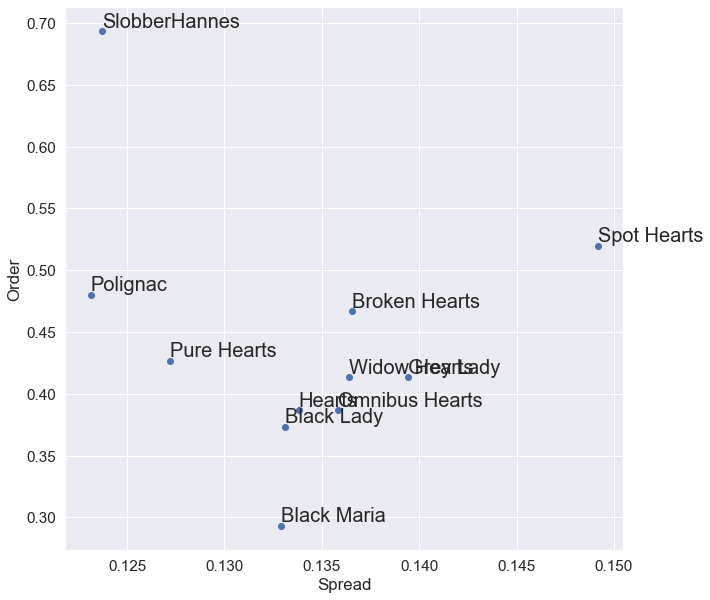

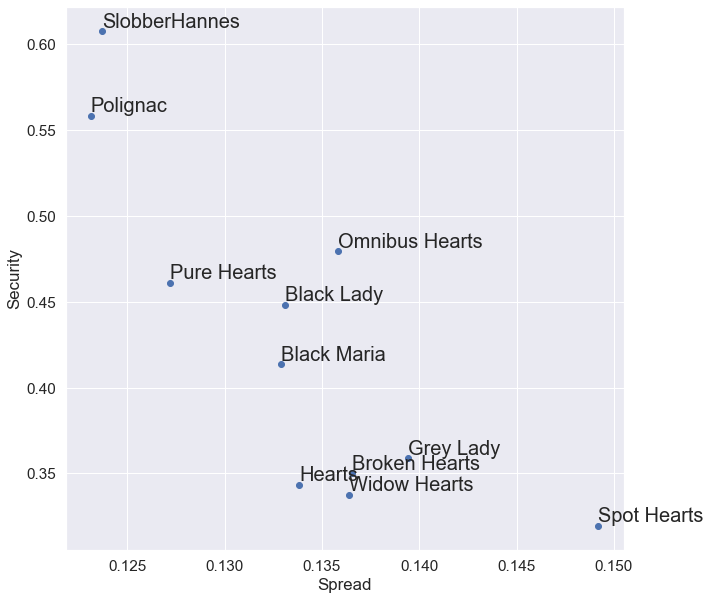

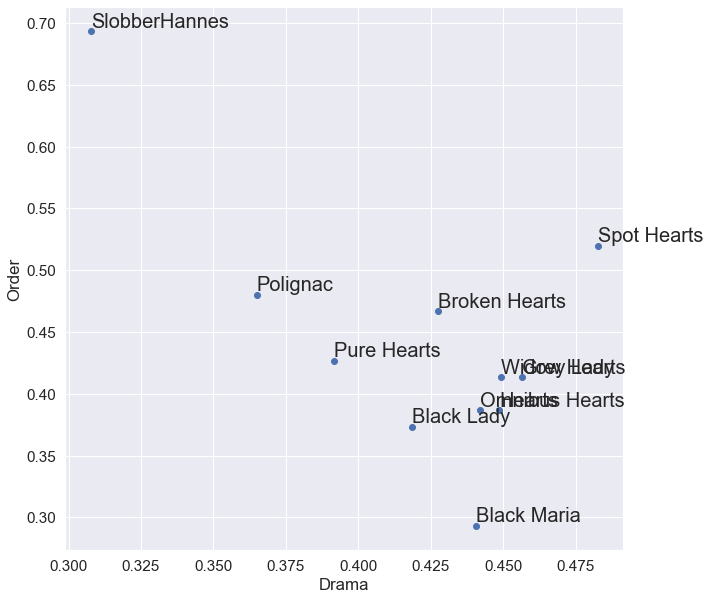

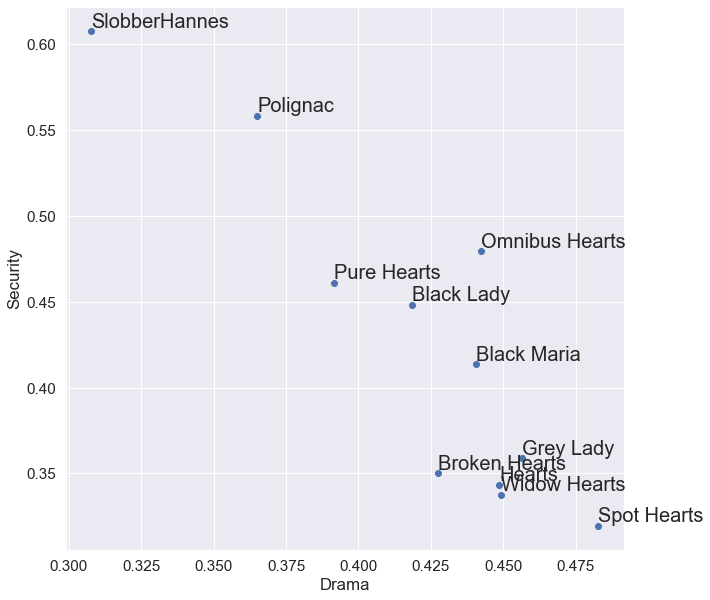

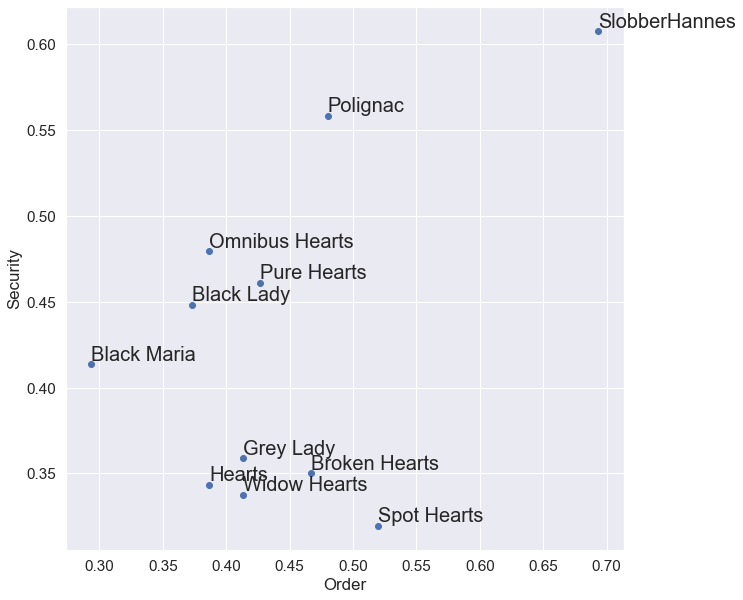

In [18]:
complist = ["Hearts", "HeartsNoMoon", "BlackMaria", "BlackLady", "HeartsOmnibus", "Hearts7Q", "Polignac", "SlobberHannes", "PureHearts", "WidowHearts", "SpotHearts"]
vnames = ["Hearts", "Broken Hearts", "Black Maria", "Black Lady", "Omnibus Hearts", "Grey Lady", "Polignac", "SlobberHannes", "Pure Hearts", "Widow Hearts", "Spot Hearts"]
newnames = ["Spread", "Drama", "Order", "Security"]
fpw = []
fpwerr = []
nl = []
nlerr = []
wvals = []
vals2 = []
hlist = {}
for n in newnames:
    hlist[n] = []
for game in complist:
    nump = 4
    if game == "Knaves":
        nump = 3
    print(game)
    fopen = open("../CardStockXam/bin/Release3/games/" + game + str(nump) + ".gdl" + "RndandAI" + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()
    score = []
    rank = []
    ranks = []
    allrank = []
    for i in range(nump):
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        score.append(sum(scores) / count[type])
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])
        allrank.extend(ranks[i])
        rank.append(sum(ranks[i]) / count[type])
    maxr = np.max(allrank)
    fpw.append(len([x for x in ranks[0] if x == 0]) / count[type])
    nl.append(len([x for x in ranks[0] if x != maxr]) / count[type])

    vals = []
    v2 = []
    for j in range(epoch):
        x = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x == 0]) / (count[type]/epoch)
        vals.append(x)
        y = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x != maxr]) / (count[type]/epoch)
        v2.append(y)
    fpwerr.append(np.std(vals))
    nlerr.append(np.std(v2))
    wvals.append(vals)
    vals2.append(v2)
    wsize = 1 - 1 / nump
    print(((sum(vals) / len(vals)) - (1 / nump)) / wsize)
    heuristics["Order"] = ((sum(vals) / len(vals)) - (1 / nump)) / wsize
        
    dthresh = (1 + (nump - 2) / (nump - 1)) / 2
    heuristics["Drama"] = 0
    heuristics["Security"] = 0
    for type in ["AllAI"]:
        
        ropen = open("../CardStockXam/bin/Release3/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
        resdata = ropen.readlines()[9:]
        ropen.close()
        ranksfull = []
        for d in resdata:
            ranksfull.append([int(x) for x in d.strip().split(",")[:-1]])
        
        fopen = open("../CardStockXam/bin/Release3/games/" + game + str(nump) + ".gdl" + type + "-leadstats.txt")
        data = fopen.readlines()
        fopen.close()
        preds = [[] for i in range(nump)]
        averages = [np.zeros(100) for i in range(nump)]

        count2 = 0
        gamenum = int(data[1].strip()[4:])
        for d in data[2:] + ["game0"]:
            if not d[0].isdigit():
                nextgame = int(d.strip()[4:])
                maxlen = 0
                for p in preds:
                    if len(p) > maxlen:
                        maxlen = len(p)

                #ranks = [(((nump - 1) - ranksfull[i][gamenum]) / (nump - 1), i) for i in range(len(preds))]
                ranks = [(preds[i][-1], i) for i in range(len(preds))]
                sortedranks = sorted(ranks, key=getKey)
                winner = sortedranks[-1][1]

                dcount = 0
                drama = 0
                for s in preds[winner]:
                    if s < dthresh:
                        dcount += 1
                        drama += (dthresh - s) ** 0.5
                if dcount > 0:
                    drama /= dcount
                    
                heuristics["Drama"] += drama / count[type]
                heuristics["Security"] += (1 - dcount /  len(preds[winner])) / count[type]

                preds = [[] for i in range(nump)]
                count2 += 1
                gamenum = nextgame
            else:
                leads = [float(x) for x in d[:-2].strip().split(",")]
                for p in range(nump):
                    preds[p].append(leads[p + 1])

    

    
    fopen = open("../CardStockXam/bin/Release3/games/" + game + str(nump) + ".gdl-heuristics.txt")
    data = fopen.readlines()
    fopen.close()
    names = []
    values = []
    for line in data:
        h = line.strip().split("\t")
        names.append(h[0])
        values.append(float(h[1]))
        if (names[-1] in ["MeaningfulMoves", "Fairness"]):
            heuristics[names[-1]] = values[-1]
    newvalues = []
    for n in newnames:
        if n == "Spread":
            newvalues.append(heuristics["MeaningfulMoves"])
            hlist[n].append(heuristics["MeaningfulMoves"])
        else:
            newvalues.append(heuristics[n])
            hlist[n].append(heuristics[n])
#print(hlist)

# the text bounding box
bbox = {'fc': '1', 'pad': 2}

for h in newnames:
    ax = plt.figure(figsize=(30,5)).gca()
    plt.title(h, fontsize=30)
    ax.get_yaxis().set_visible(False)
    minv = min(hlist[h])
    maxv = max(hlist[h])
    dif = maxv - minv
    ax.hlines(1,min(hlist[h]),max(hlist[h]))  # Draw a horizontal line
    ax.hlines(1,minv - 0.05 * dif,minv, linestyle="--")  # Draw a horizontal line
    ax.hlines(1,maxv, maxv + 0.05 * dif, linestyle="--")  # Draw a horizontal line

    ax.eventplot(hlist[h][:1], orientation='horizontal', colors='r', linewidth=10)
    ax.eventplot(hlist[h][1:], orientation='horizontal', colors='b')
    #ax.scatter(hlist[h], np.zeros(len(complist)))
    offset = [+0.2, -0.2]
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
    for i, txt in enumerate(vnames):
        ax.annotate(txt, (hlist[h][i], 1), rotation=60, fontsize=20, ha='left', va='bottom')#, bbox=bbox)
        
for i in range(len(newnames)):
    for j in range(i + 1, len(newnames)):
        ax = plt.figure(figsize=(10,10)).gca()
        ax.scatter(hlist[newnames[i]], hlist[newnames[j]])
        plt.xlabel(newnames[i])
        plt.ylabel(newnames[j])
        for v, txt in enumerate(vnames):
            ax.annotate(txt, (hlist[newnames[i]][v], hlist[newnames[j]][v]), rotation=0, fontsize=20, ha='left', va='bottom')#, bbox=bbox)
        

In [19]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(hlist)
x = MinMaxScaler().fit_transform(df.values)
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init="random",
           n_init = 10, max_iter=300,
           tol=1e-04, random_state=0)
result = km.fit(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pcadf = pd.DataFrame(data= principal_components,
                       columns=["PCA 1", "PCA 2"])
pcadf["cluster"] = pd.Series(result.labels_).astype("str")
pcadf["variant"]= pd.Series(vnames).astype("str")

pcadf

PCA 1     PCA 2 cluster         variant
0  -0.301787 -0.097186       0          Hearts
1  -0.216003  0.133926       0   Broken Hearts
2  -0.177386 -0.343228       2     Black Maria
3   0.019539 -0.168656       2      Black Lady
4  -0.028178 -0.115535       2  Omnibus Hearts
5  -0.379642  0.050135       0       Grey Lady
6   0.686711 -0.131744       1        Polignac
7   1.113360  0.352519       1   SlobberHannes
8   0.280221 -0.148747       2     Pure Hearts
9  -0.345579  0.008450       0    Widow Hearts
10 -0.651255  0.460066       0     Spot Hearts

In [21]:
vnames = ["Hearts", "Broken Hearts", "Black Maria", "Black Lady", "Omnibus Hearts", "Grey Lady", "Polignac", "SlobberHannes", "Pure Hearts", "Widow Hearts", "Spot Hearts"]
df["variant"]= pd.Series(vnames).astype("str")
df

Spread     Drama     Order  Security         variant
0   0.133821  0.448463  0.386667  0.343462          Hearts
1   0.136569  0.427309  0.466667  0.350000   Broken Hearts
2   0.132887  0.440412  0.293333  0.413462     Black Maria
3   0.133087  0.418492  0.373333  0.448269      Black Lady
4   0.135815  0.442093  0.386667  0.479423  Omnibus Hearts
5   0.139426  0.456402  0.413333  0.358846       Grey Lady
6   0.123133  0.365005  0.480000  0.558438        Polignac
7   0.123725  0.307693  0.693333  0.607500   SlobberHannes
8   0.127195  0.391642  0.426667  0.461154     Pure Hearts
9   0.136372  0.449207  0.413333  0.337500    Widow Hearts
10  0.149190  0.482671  0.520000  0.319615     Spot Hearts

<Figure size 432x288 with 0 Axes>

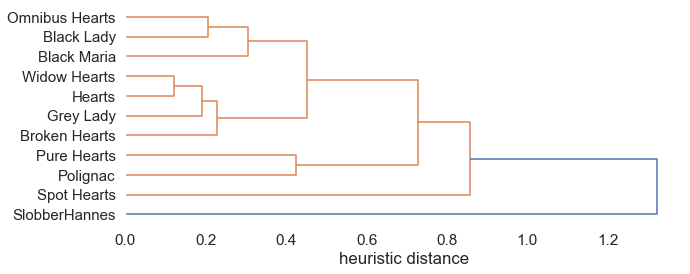

In [422]:
c = hierarchy.linkage(np.array(x), 'average')

plt.figure()
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
dn = hierarchy.dendrogram(c, labels = vnames, ax=ax, orientation = 'right')
ax.tick_params(axis='y', which='major', labelsize=15)
plt.xlabel("heuristic distance")
ax.set_facecolor((1, 1, 1))
plt.show()

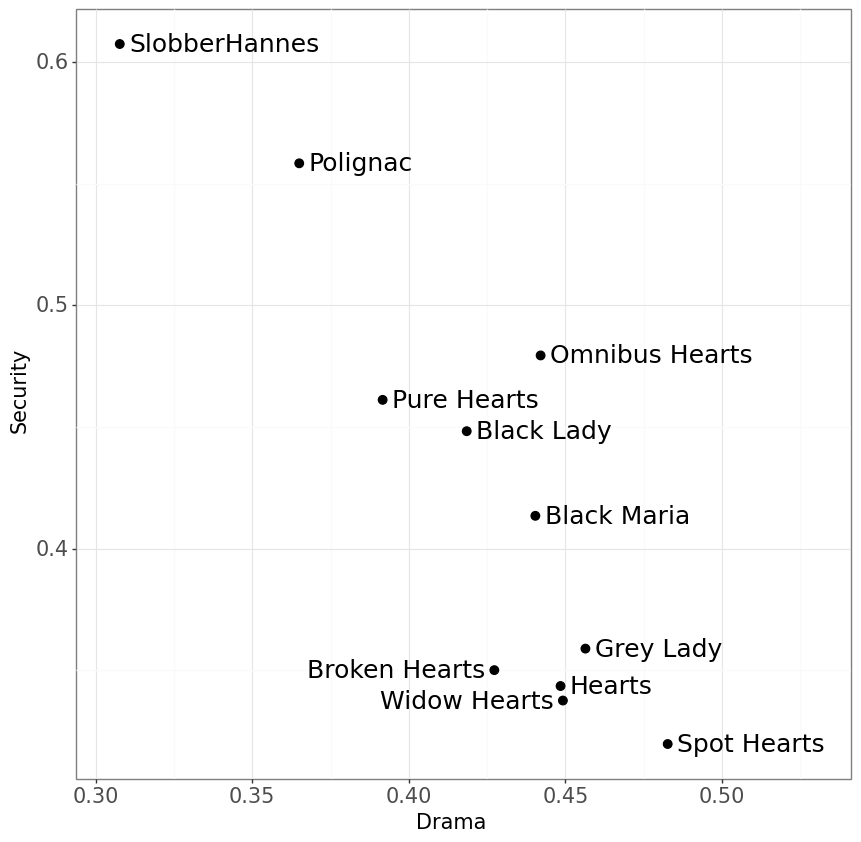

<ggplot: (8788300353796)>

In [35]:
ggplot(df[(df["variant"] != "Widow Hearts") & (df["variant"] != "Broken Hearts")], aes("Drama", "Security", label="variant")) + \
geom_text(size=18, nudge_x = 0.003, ha = "left") + \
geom_text(size=18, nudge_x = -0.003, ha = "right", data=df[(df["variant"] == "Broken Hearts") | (df["variant"] == "Widow Hearts")]) + \
geom_point(data=df, size=3) + \
theme_bw() + \
theme(figure_size=(10, 10), text=element_text(size=15)) + \
xlim(0.305, 0.53)

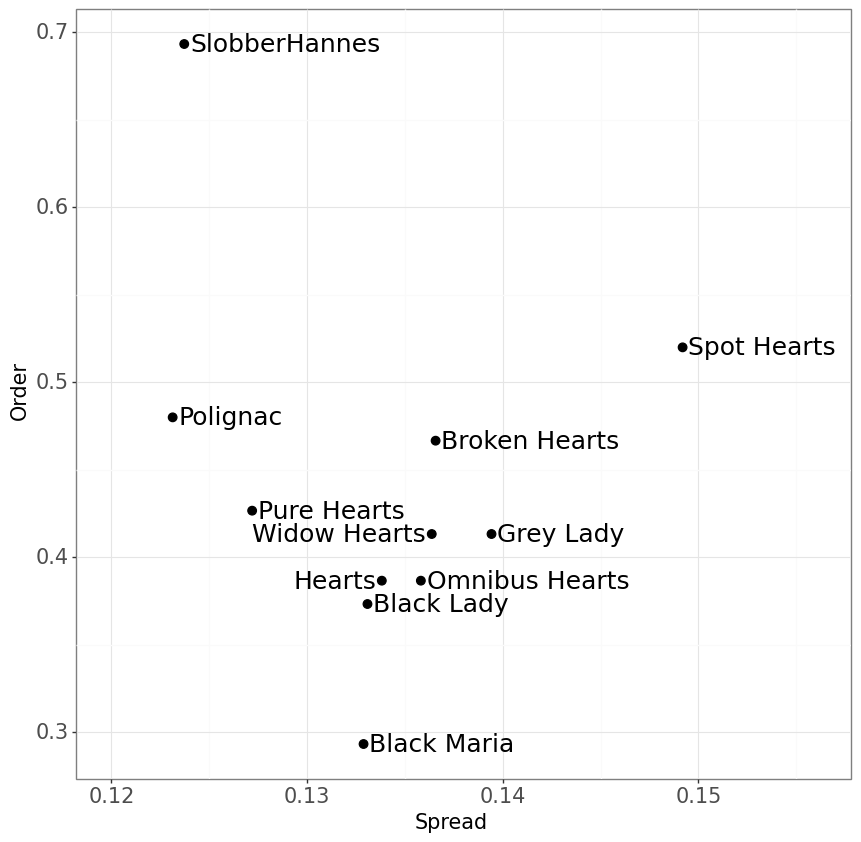

<ggplot: (8788321887332)>

In [37]:
ggplot(df[(df["variant"] != "Hearts") & (df["variant"] != "Widow Hearts")], aes("Spread", "Order", label="variant")) + \
geom_text(size=18, nudge_x = 0.0003, ha = "left") + \
geom_text(size=18, nudge_x = -0.0003, ha = "right", data=df[(df["variant"] == "Hearts") | (df["variant"] == "Widow Hearts")]) + \
geom_point(data=df, size=3) + \
theme_bw() + \
theme(figure_size=(10, 10), text=element_text(size=15)) + \
xlim(0.12, 0.156)

In [101]:
x

array([[0.41015548, 0.80450127, 0.23333333, 0.08283233],
       [0.51564653, 0.68360719, 0.43333333, 0.10554442],
       [0.37433576, 0.75849197, 0.        , 0.3259853 ],
       [0.38201142, 0.63321953, 0.2       , 0.44689379],
       [0.48671521, 0.76809803, 0.23333333, 0.55511022],
       [0.62527062, 0.8498724 , 0.3       , 0.13627255],
       [0.        , 0.32753761, 0.46666667, 0.82957582],
       [0.02270714, 0.        , 1.        , 1.        ],
       [0.15587483, 0.4797701 , 0.33333333, 0.49164997],
       [0.50808568, 0.80875588, 0.3       , 0.06212425],
       [1.        , 1.        , 0.56666667, 0.        ]])

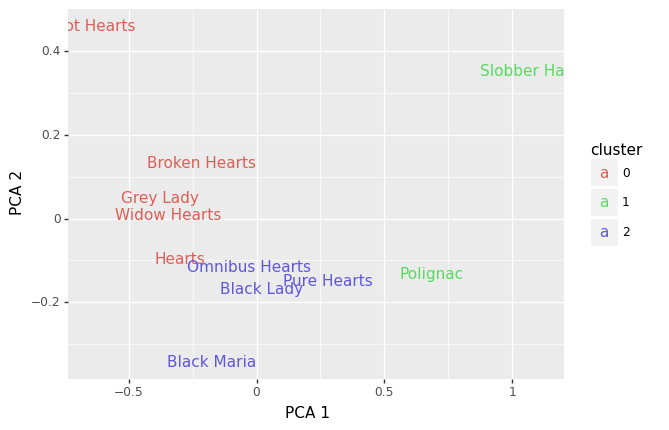

<ggplot: (8767018521730)>

In [102]:
from plotnine import *
ggplot(pcadf, aes(x="PCA 1", y="PCA 2", color="cluster")) + \
geom_text(aes(label="variant"))

In [84]:
#calculate distance matrix dmat
from scipy.cluster import hierarchy
dmat = np.zeros((len(vnames), len(vnames)))

for v, txt in enumerate(vnames):
    for x, tx2 in enumerate(vnames):
        for n in newnames:
            dmat[v][x] += (hlist[n][v] - hlist[n][x]) ** 2
        dmat[v][x] = dmat[v][x] ** 0.5
         



(0, 1)

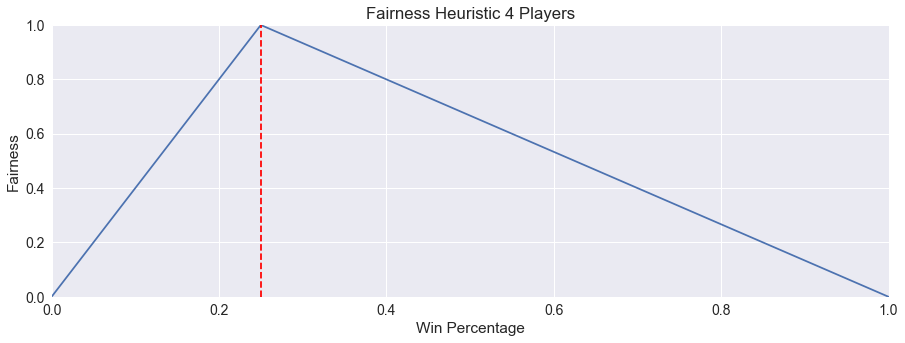

In [214]:
xs = [0, .25, 1]
ys = [0, 1, 0]
ax = plt.figure(figsize=(15,5)).gca()
plt.plot(xs, ys)
plt.title("Fairness Heuristic 4 Players")
plt.ylabel("Fairness")
plt.xlabel("Win Percentage")
plt.axvline(x=0.25, color="r", ls="dashed")
plt.ylim(0, 1)
plt.xlim(0, 1)

In [ ]:
xs = np.linspace(1.01, 6.5, 200)
ys = [(1 + (x - 2) / (x - 1)) / 2 for x in xs]
xss = np.arange(2, 7)
yss = [(1 + (x - 2) / (x - 1)) / 2 for x in xss]
ax = plt.figure(figsize=(15,5)).gca()
plt.plot(xs, ys)
plt.scatter(xss, yss)
plt.title("When is a player not in the lead?")
plt.ylabel("Drama Threshold")
plt.xlabel("Number of Players")
plt.ylim(0, 1)
plt.xlim(1, 6.5)

In [ ]:
xs = np.linspace(-1, 1, 200)
ys = [(1 - (x / 2 + 0.5)) for x in xs]
ax = plt.figure(figsize=(15,5)).gca()
plt.plot(xs, ys)
plt.title("Convergence")
plt.ylabel("Convergence")
plt.xlabel("Slope")


In [380]:
sn.color_palette("colorblind")

[(0.0, 0.4470588235294118, 0.6980392156862745),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

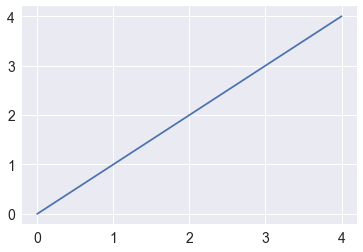

In [433]:
x, = plt.plot(range(5), range(5))

In [434]:
print(x)

Line2D(_line0)


In [436]:
x.get_ydata()

array([0, 1, 2, 3, 4])

In [443]:
x = np.linspace(0, 5, num=6, endpoint=True)
y = range(6)
f = interp1d(x, y)
xnew = np.linspace(0, 5, num=41)
ynew = f(xnew)

In [442]:
ynew

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,  5.   ])

In [61]:
data[0]

array([0.41015548, 0.80450127, 0.23333333])

In [51]:
df.values

array([[0.13382051, 0.44846301, 0.38666667],
       [0.13656923, 0.42730915, 0.46666667],
       [0.13288718, 0.44041237, 0.29333333],
       [0.13308718, 0.4184924 , 0.37333333],
       [0.13581538, 0.44209323, 0.38666667],
       [0.13942564, 0.45640198, 0.41333333],
       [0.12313333, 0.36500466, 0.48      ],
       [0.123725  , 0.30769264, 0.69333333],
       [0.12719487, 0.39164206, 0.42666667],
       [0.12772222, 0.41863787, 0.45333333],
       [0.14918974, 0.48267107, 0.52      ]])